In [8]:
# This code performs object detection on cricket images using a custom YOLOv5 model. The code trains the model
# on a dataset of cricket images, logs the training process and results using Comet.ml, and performs hyperparameter
# tuning using the Optuna library.

# First, the necessary dependencies are installed and the version of PyTorch is checked. The YOLOv5 model is then
# trained on the custom cricket dataset for a specified number of epochs. The training progress and results are logged
# using Tensorboard for easy visualization and analysis.

# After training, the model performs inference on test images and displays the results. The training process and results 
# are also logged using Comet.ml for further analysis and visualization.

# The code then performs hyperparameter tuning using Optuna to find the best set of hyperparameters for the YOLOv5
# model. The objective function defines the hyperparameters to be optimized, such as the image size, batch size, number of
# epochs, and device to use for training. The function then executes the YOLOv5 training command with the chosen 
# hyperparameters, captures the output, and prints it to the console to show the training progress and any error messages 
# that might occur.

# In the if __name__ == '__main__' block, an Optuna study object is created and the study.optimize function is called to run 
# the hyperparameter search for a specified number of trials. After the search is completed, the best hyperparameters found, 
# the best return code, and the best trial number are printed.

# This code provides a comprehensive solution for performing object detection on cricket images using a custom YOLOv5
# model, with options for logging, visualization, and hyperparameter tuning. The code can be easily adapted for use with 
# other object detection tasks and datasets, making it a versatile tool for computer vision research and development.

In [9]:
import os

# Define the directory path
dir_path = '/home/sidd/Desktop/cricket_analysis/yolov5'

# Check if the directory exists
if not os.path.exists(dir_path):
    print(f"Error: Directory '{dir_path}' does not exist.")
    exit()

# Change the current working directory
os.chdir(dir_path)

# Confirm the current working directory has been changed
print(f"Current working directory: {os.getcwd()}")

Current working directory: /home/sidd/Desktop/cricket_analysis/yolov5


In [10]:
# This code installs necessary dependencies and checks the version of PyTorch being used.
import torch
import subprocess
from IPython.display import Image, clear_output # to display images
from utils.downloads import attempt_download # to download models/datasets

# Check for GPU support and print PyTorch version
if torch.cuda.is_available():
    print('Using CUDA device.')
    gpu_info = subprocess.run('nvidia-smi', stdout=subprocess.PIPE, shell=True, encoding='utf-8')
    print(gpu_info.stdout)
else:
    print('CUDA is not available. Using CPU.')
print('Using PyTorch version:', torch.version)

Using CUDA device.
Wed Mar 29 12:32:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 465.19.01    CUDA Version: 11.3     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA TITAN RTX    On   | 00000000:01:00.0 Off |                  N/A |
| 63%   72C    P8    17W / 280W |     70MiB / 24217MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA TITAN RTX    On   | 00000000:02:00.0 Off |             

In [25]:
import subprocess

# Define the command to train the model
train_cmd = [
    'python', 'train.py', 
    '--img', '416', 
    '--batch', '128', 
    '--epochs', '1', 
    '--data', '/home/sidd/Desktop/cricket_analysis/data/raw/cricket_dataset/data.yaml', 
    '--weights', 'yolov5x.pt'
]

# Execute the command and capture the output
with subprocess.Popen(train_cmd, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, bufsize=1, universal_newlines=True) as p:
    for line in p.stdout:
        print(line, end='', flush=True)

    # Wait for the process to finish and get the return code
    return_code = p.wait()

# Print the return code
print('Command returned', return_code)

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: siddharthksah. Use `wandb login --relogin` to force relogin
train: weights=yolov5x.pt, cfg=, data=/home/sidd/Desktop/cricket_analysis/data/raw/cricket_dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1, batch_size=128, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-131-g0c8de3f Python-3.8.

In [39]:
import subprocess

# Define the command to train the model
train_cmd = [
    'python', 'train.py', 
    '--img', '416', 
    '--batch', '128', 
    '--epochs', '50', 
    '--data', '/home/sidd/Desktop/cricket_analysis/data/raw/cricket_dataset/data.yaml', 
    '--weights', 'yolov5x.pt'
]

# Open log file for writing
with open('/home/sidd/Desktop/cricket_analysis/train.log', 'w') as f:
    # Execute the command and capture the output
    with subprocess.Popen(train_cmd, stdout=f, stderr=subprocess.STDOUT, bufsize=1, universal_newlines=True) as p:
        # Wait for the process to finish and get the return code
        return_code = p.wait()

# Raise an exception if the return code is non-zero
if return_code != 0:
    raise RuntimeError(f'Training command failed with return code {return_code}')

# Print a message indicating success
print('Training completed successfully')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Training completed successfully


In [47]:
import re
# Open the train.log file for reading
with open('/home/sidd/Desktop/cricket_analysis/train.log', 'r') as f:
    # Read the contents of the file
    contents = f.read()

    # Find the first occurrence of "runs/train/exp" in the contents
    start_idx = contents.find('runs/train/exp')

    # Find the end of the sentence containing the occurrence
    end_idx = contents.find('.', start_idx) + 1

    # Extract the sentence containing the occurrence
    sentence = contents[start_idx:end_idx]

    # Use regular expression to find the experiment number
    exp_num = re.findall(r'exp(\d+)', sentence)[0]

    # Print the experiment number
    results_location = "/home/sidd/Desktop/cricket_analysis/yolov5/runs/train/exp" + exp_num
    print("Results saved in: " + results_location)
    
    # # Print the sentence
    # print(sentence)

Results saved in: /home/sidd/Desktop/cricket_analysis/yolov5/runs/train/exp19


In [51]:
import os

# Set the locations of the weights and test images
weight_location = os.path.join(results_location, "weights/best.pt")
test_image_location = os.path.join("/home/sidd/Desktop/cricket_analysis/data/raw/cricket_dataset/test/images")

# Set the confidence threshold and image size
conf_threshold = 0.4
img_size = 416

# Build the command
command = [
    'python', 'detect.py', 
    '--weights', weight_location, 
    '--img', str(img_size),
    '--conf', str(conf_threshold), 
    '--source', test_image_location
]

try:
    # Execute the command and capture the output
    result = subprocess.run(command, capture_output=True, check=True, text=True)
    print(result.stdout)

except subprocess.CalledProcessError as e:
    print('Error:', e.stderr)
    

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



In [60]:
import os

# Set the directory path
dir_path = '/home/sidd/Desktop/cricket_analysis/yolov5/runs/detect'

# Get a list of all subdirectories
subdirs = [os.path.join(dir_path, d) for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]

# Sort the subdirectories by modification time
subdirs.sort(key=lambda x: os.path.getmtime(x))

# Print the latest subdirectory
latest_subdir = subdirs[-1]
print("Detections saved in the: ", latest_subdir)

Detections saved in the:  /home/sidd/Desktop/cricket_analysis/yolov5/runs/detect/exp6


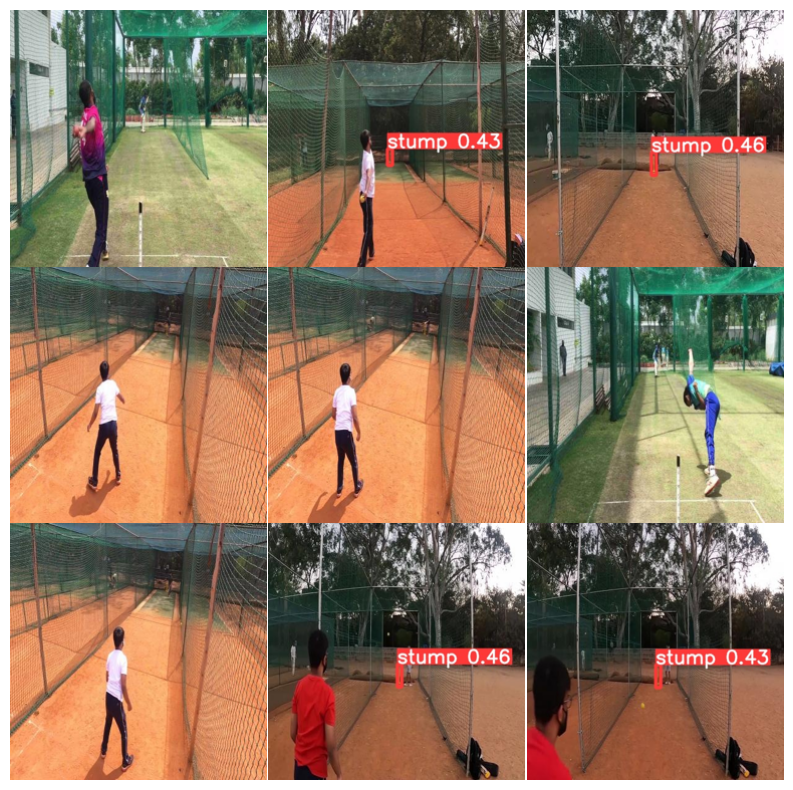

In [70]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of the grid
num_rows = 3
num_cols = 3
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate over all files in the directory
i = 0
for filename in os.listdir(latest_subdir):
    if filename.endswith(".jpg"):
        # Load and resize the image
        image = Image.open(os.path.join(latest_subdir, filename)).resize((256, 256))
        
        # Convert the image to a numpy array
        image_array = np.array(image)
        
        # Add the image to the grid
        row = i // num_cols
        col = i % num_cols
        ax[row][col].imshow(image_array)
        ax[row][col].axis('off')
        i += 1
        
        # Break out of the loop if we've added enough images
        if i == num_rows * num_cols:
            break

# Show the grid
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

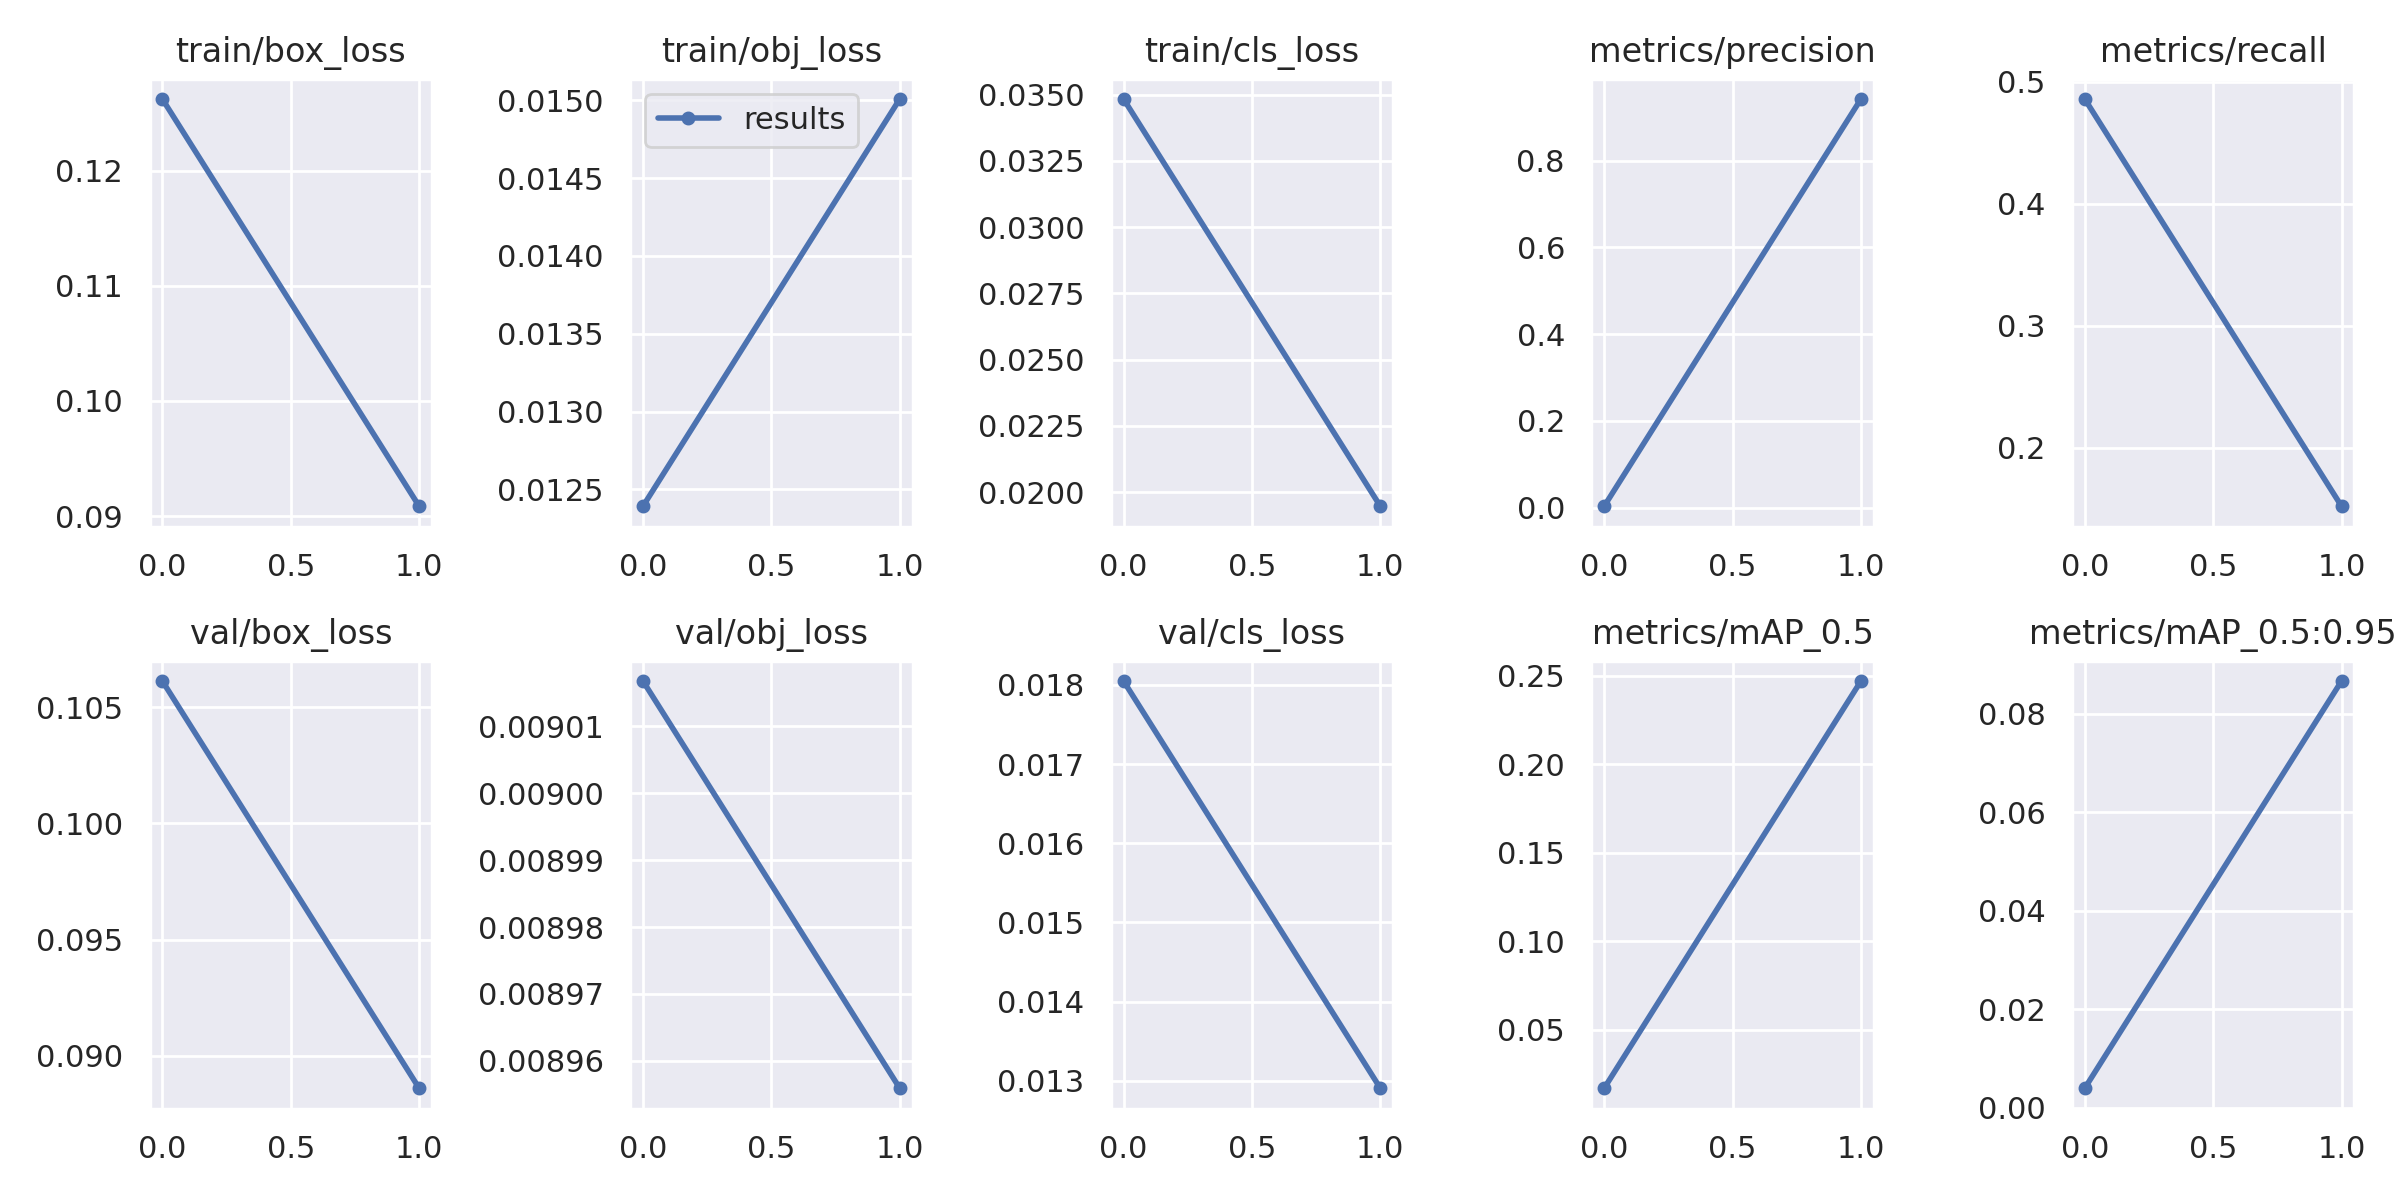

In [77]:
# # we can also output some older school graphs if the tensor board isn't working for whatever reason... 
# from utils.plots import plot_results  # plot results.txt as results.png
from IPython.display import Image
Image(filename=results_location + "/results.png")

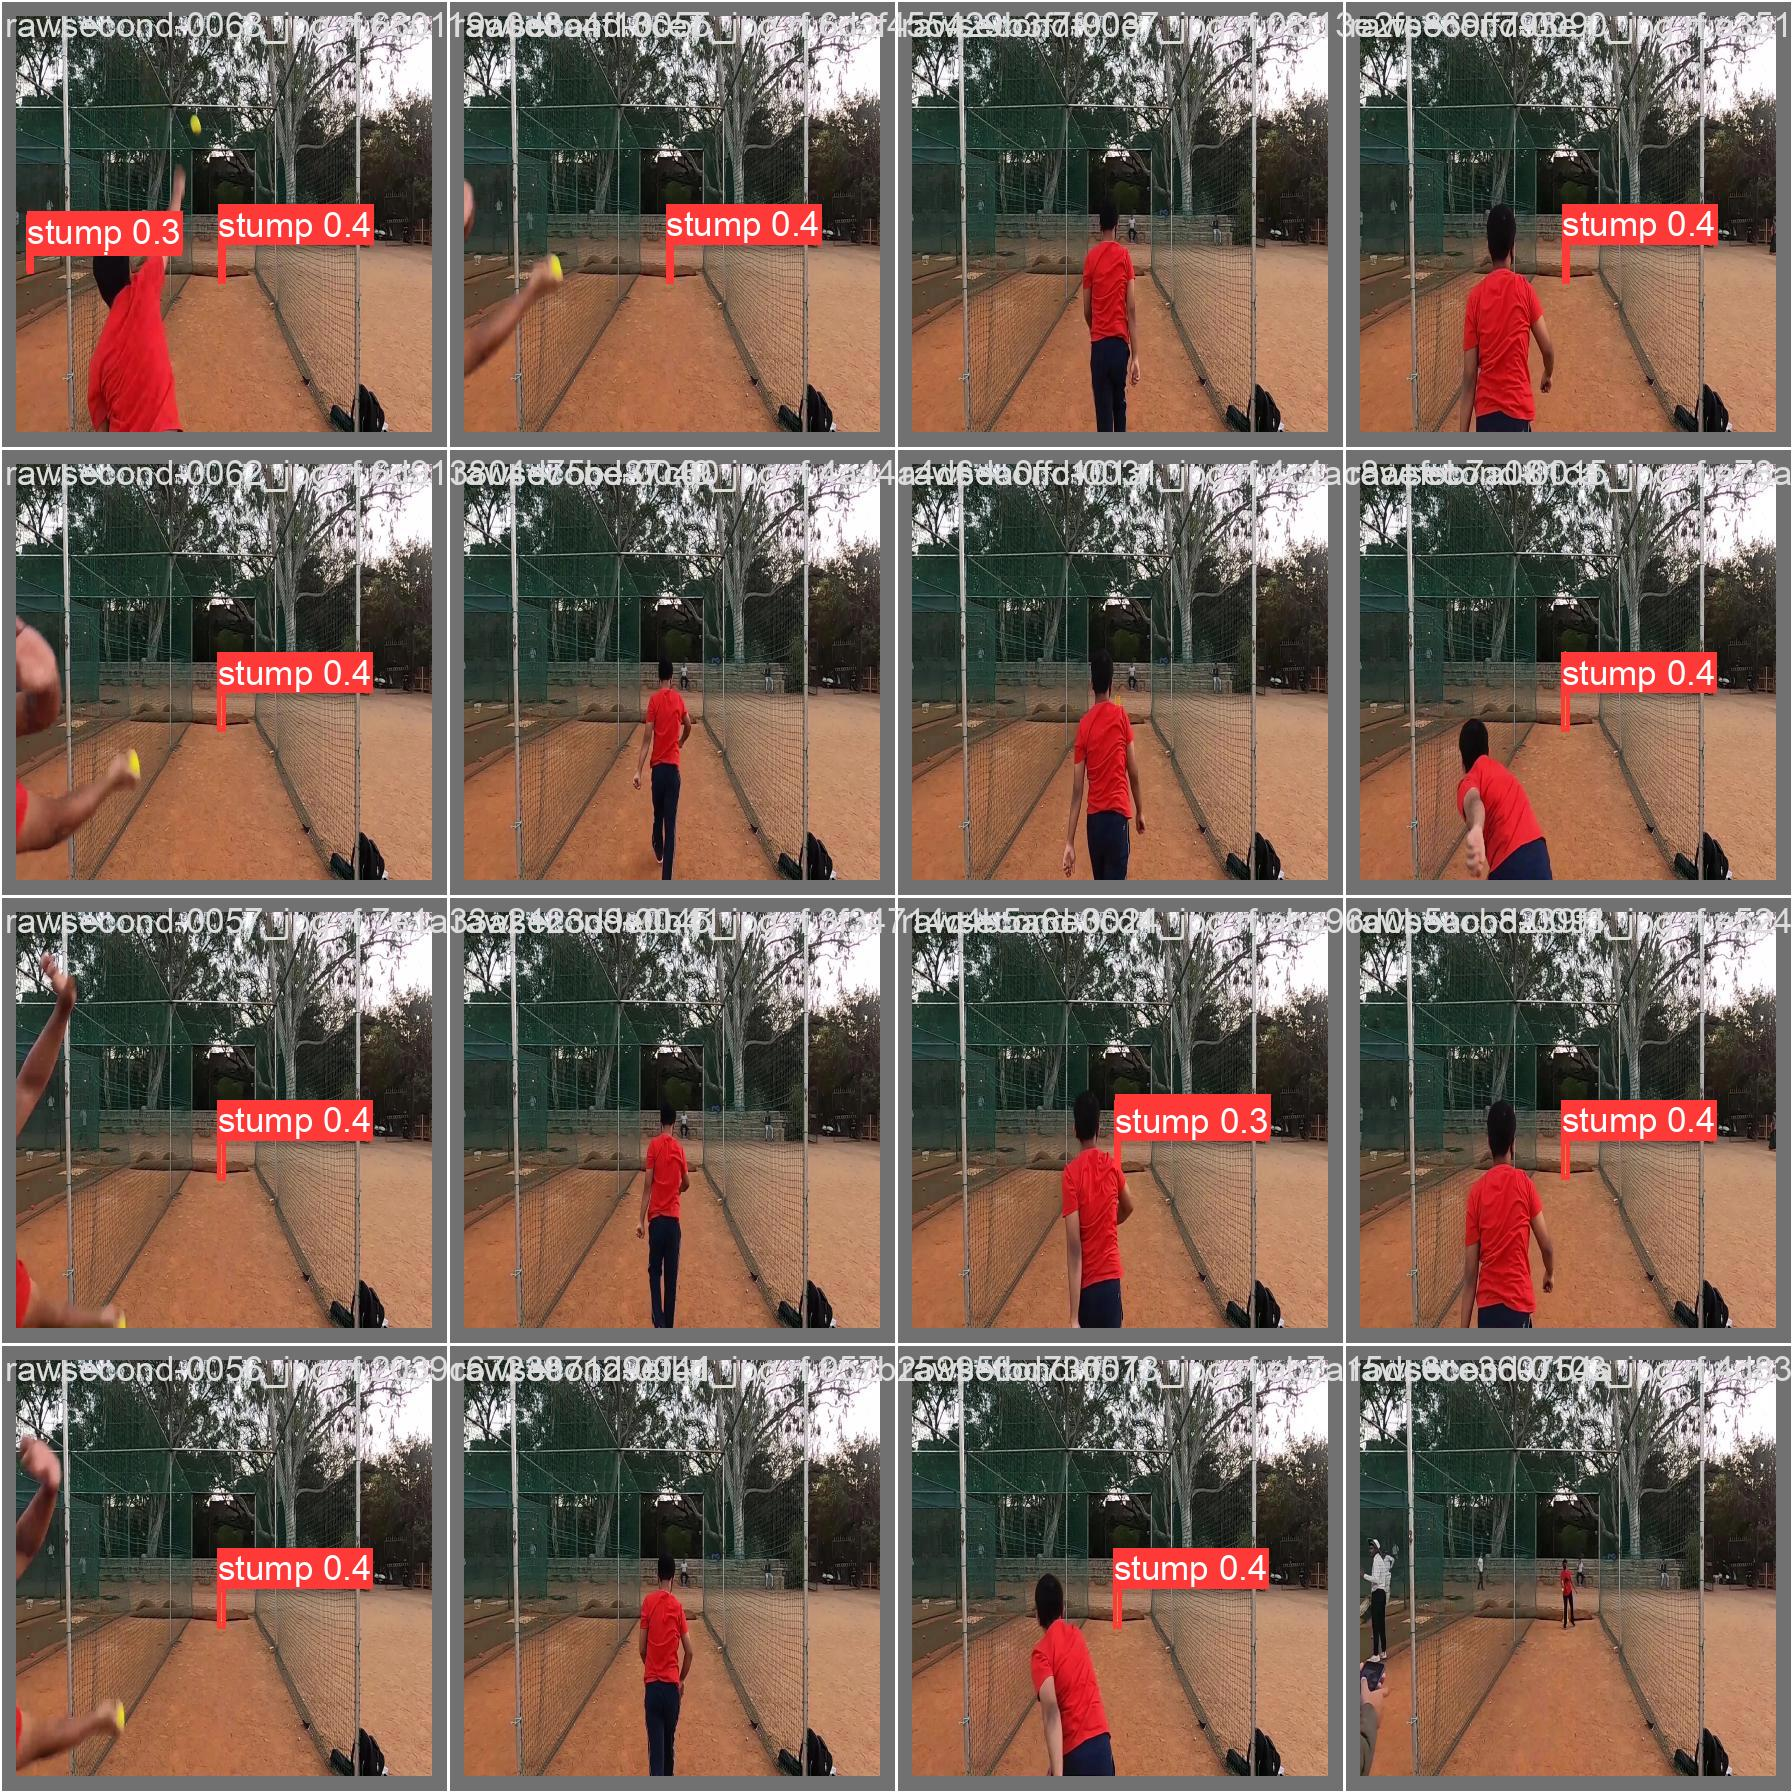

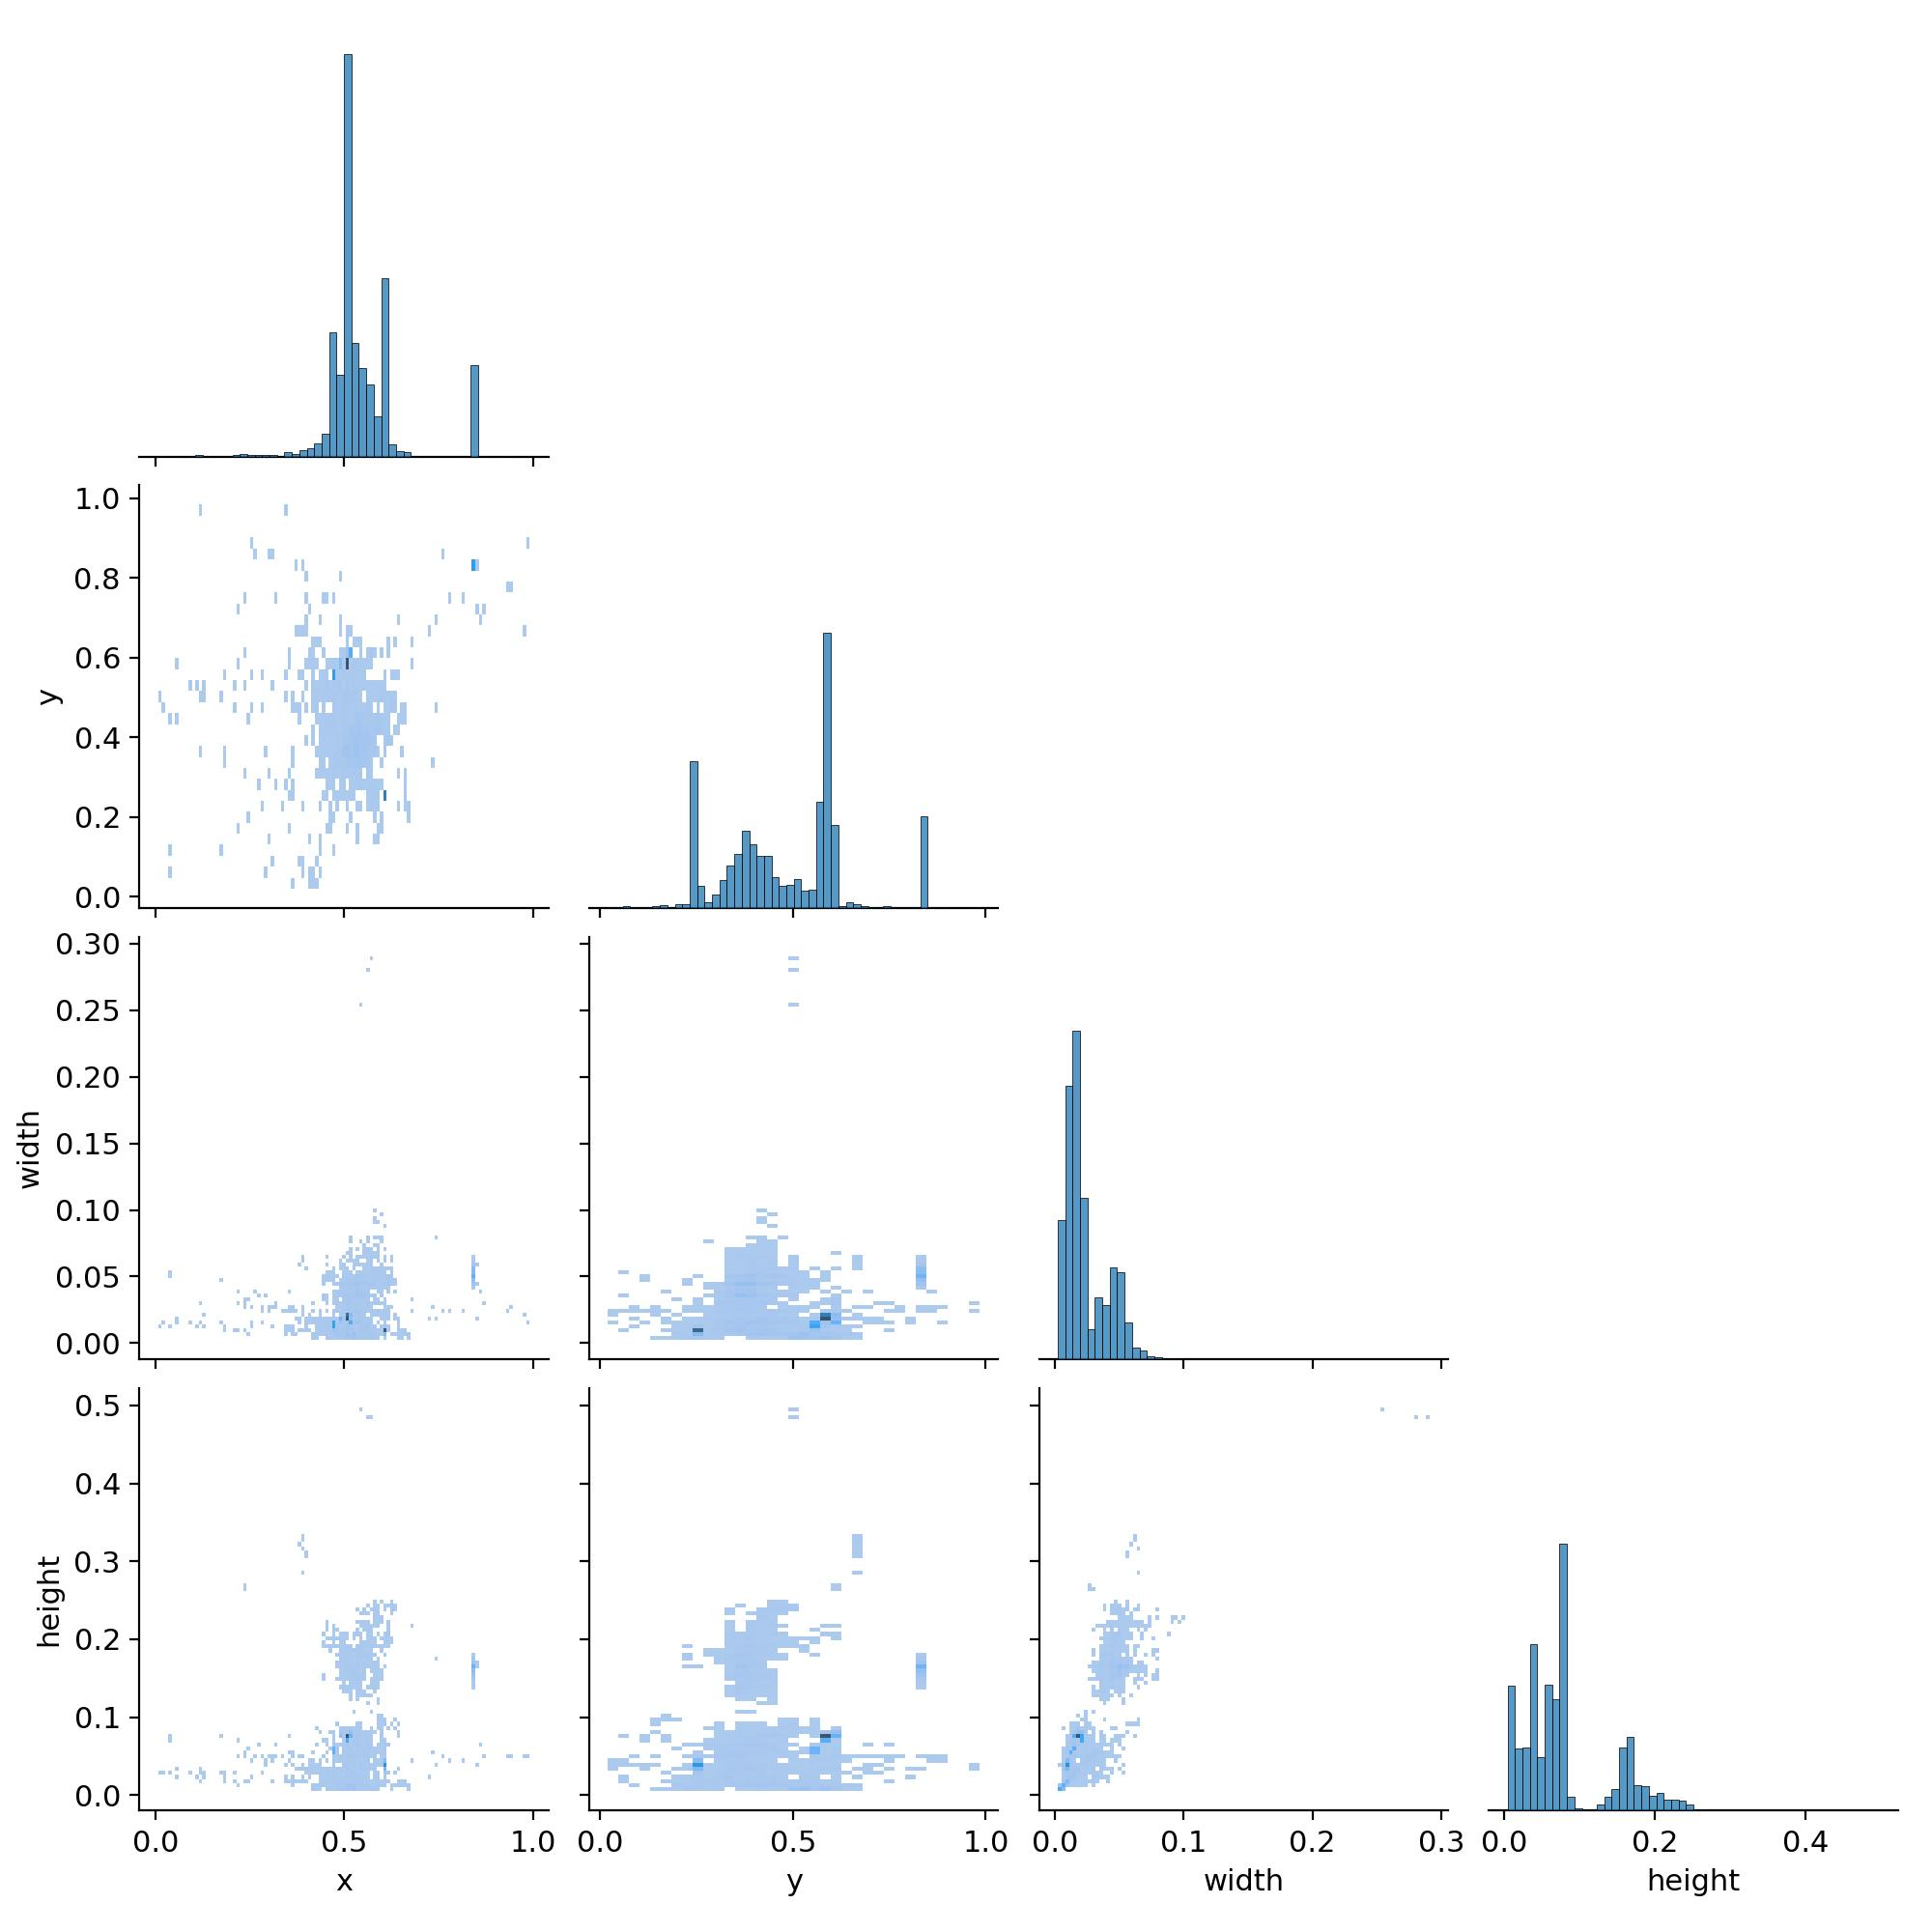

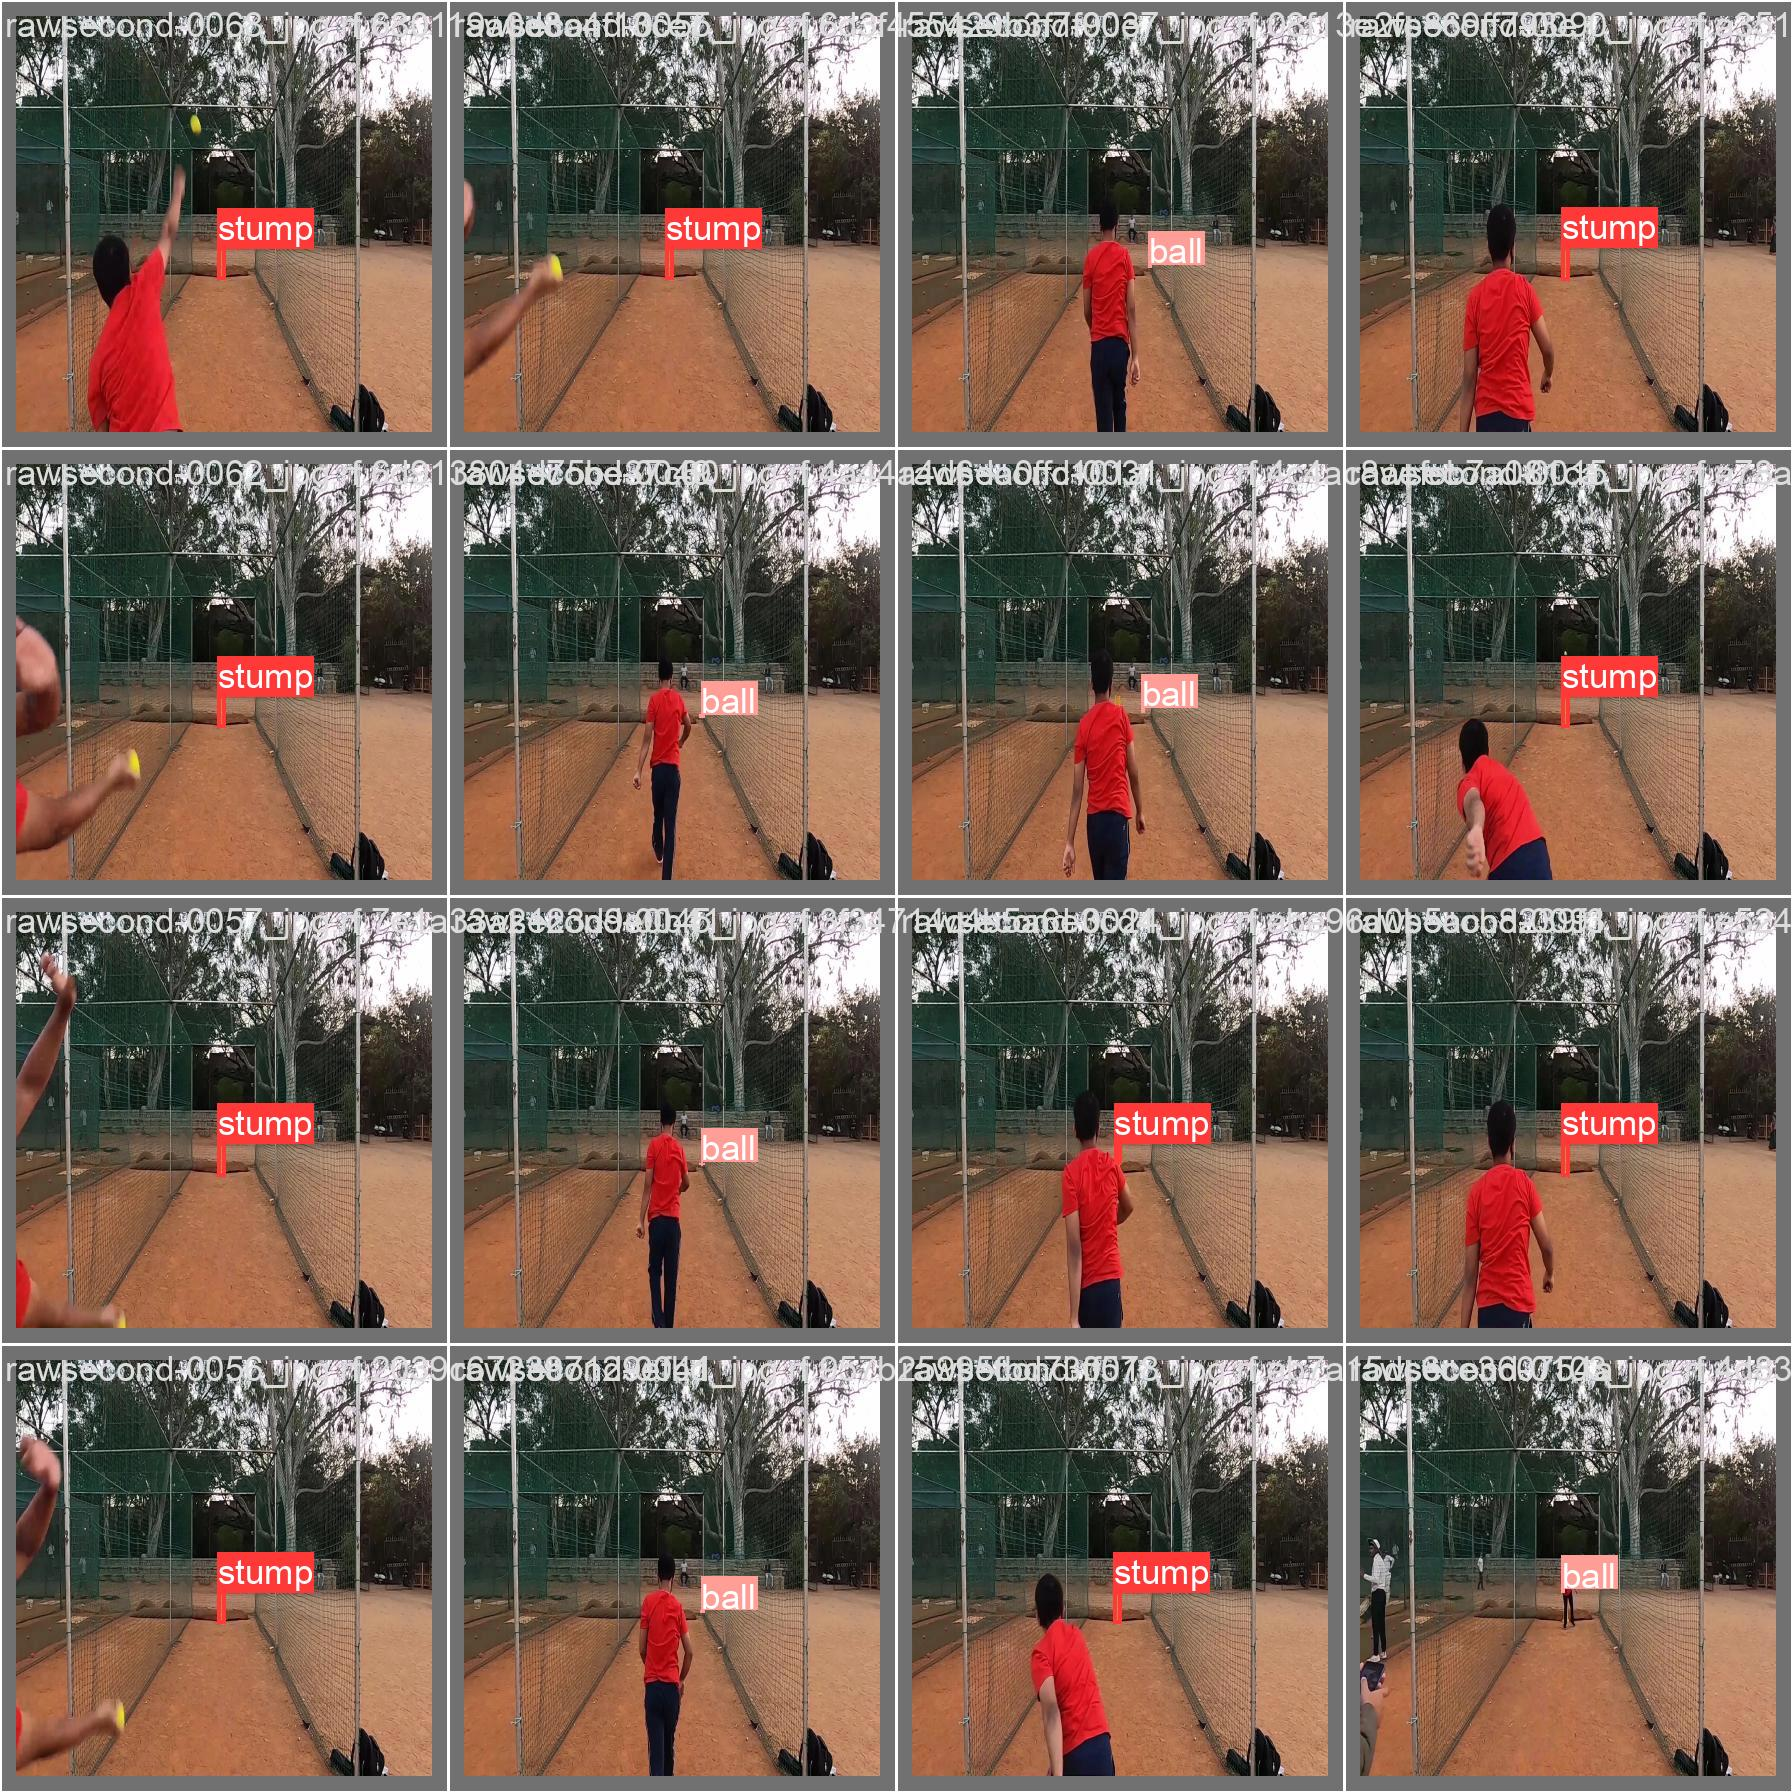

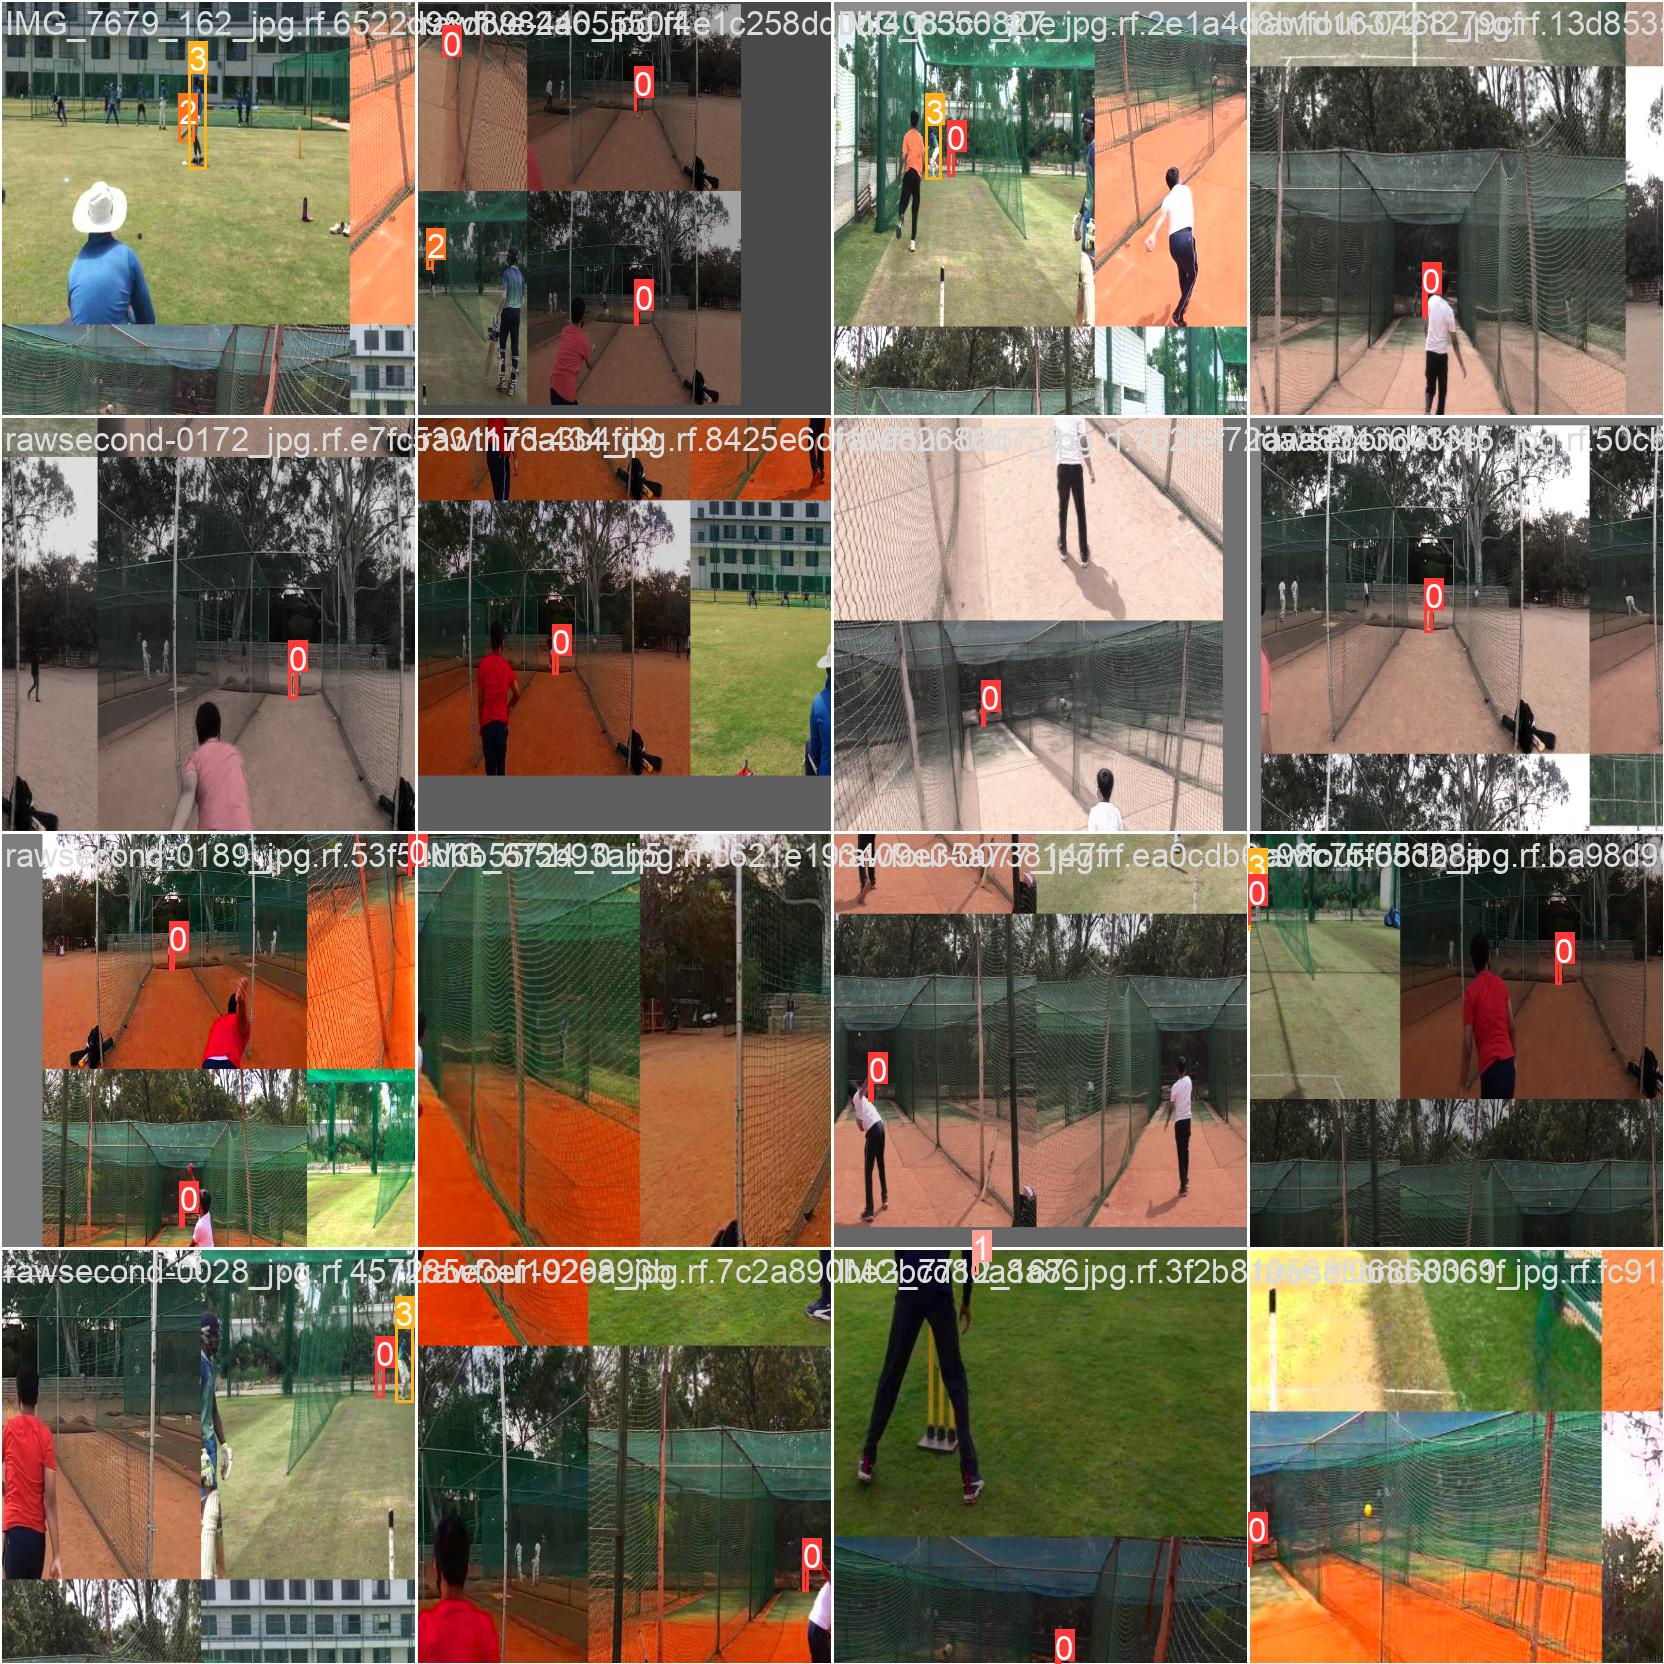

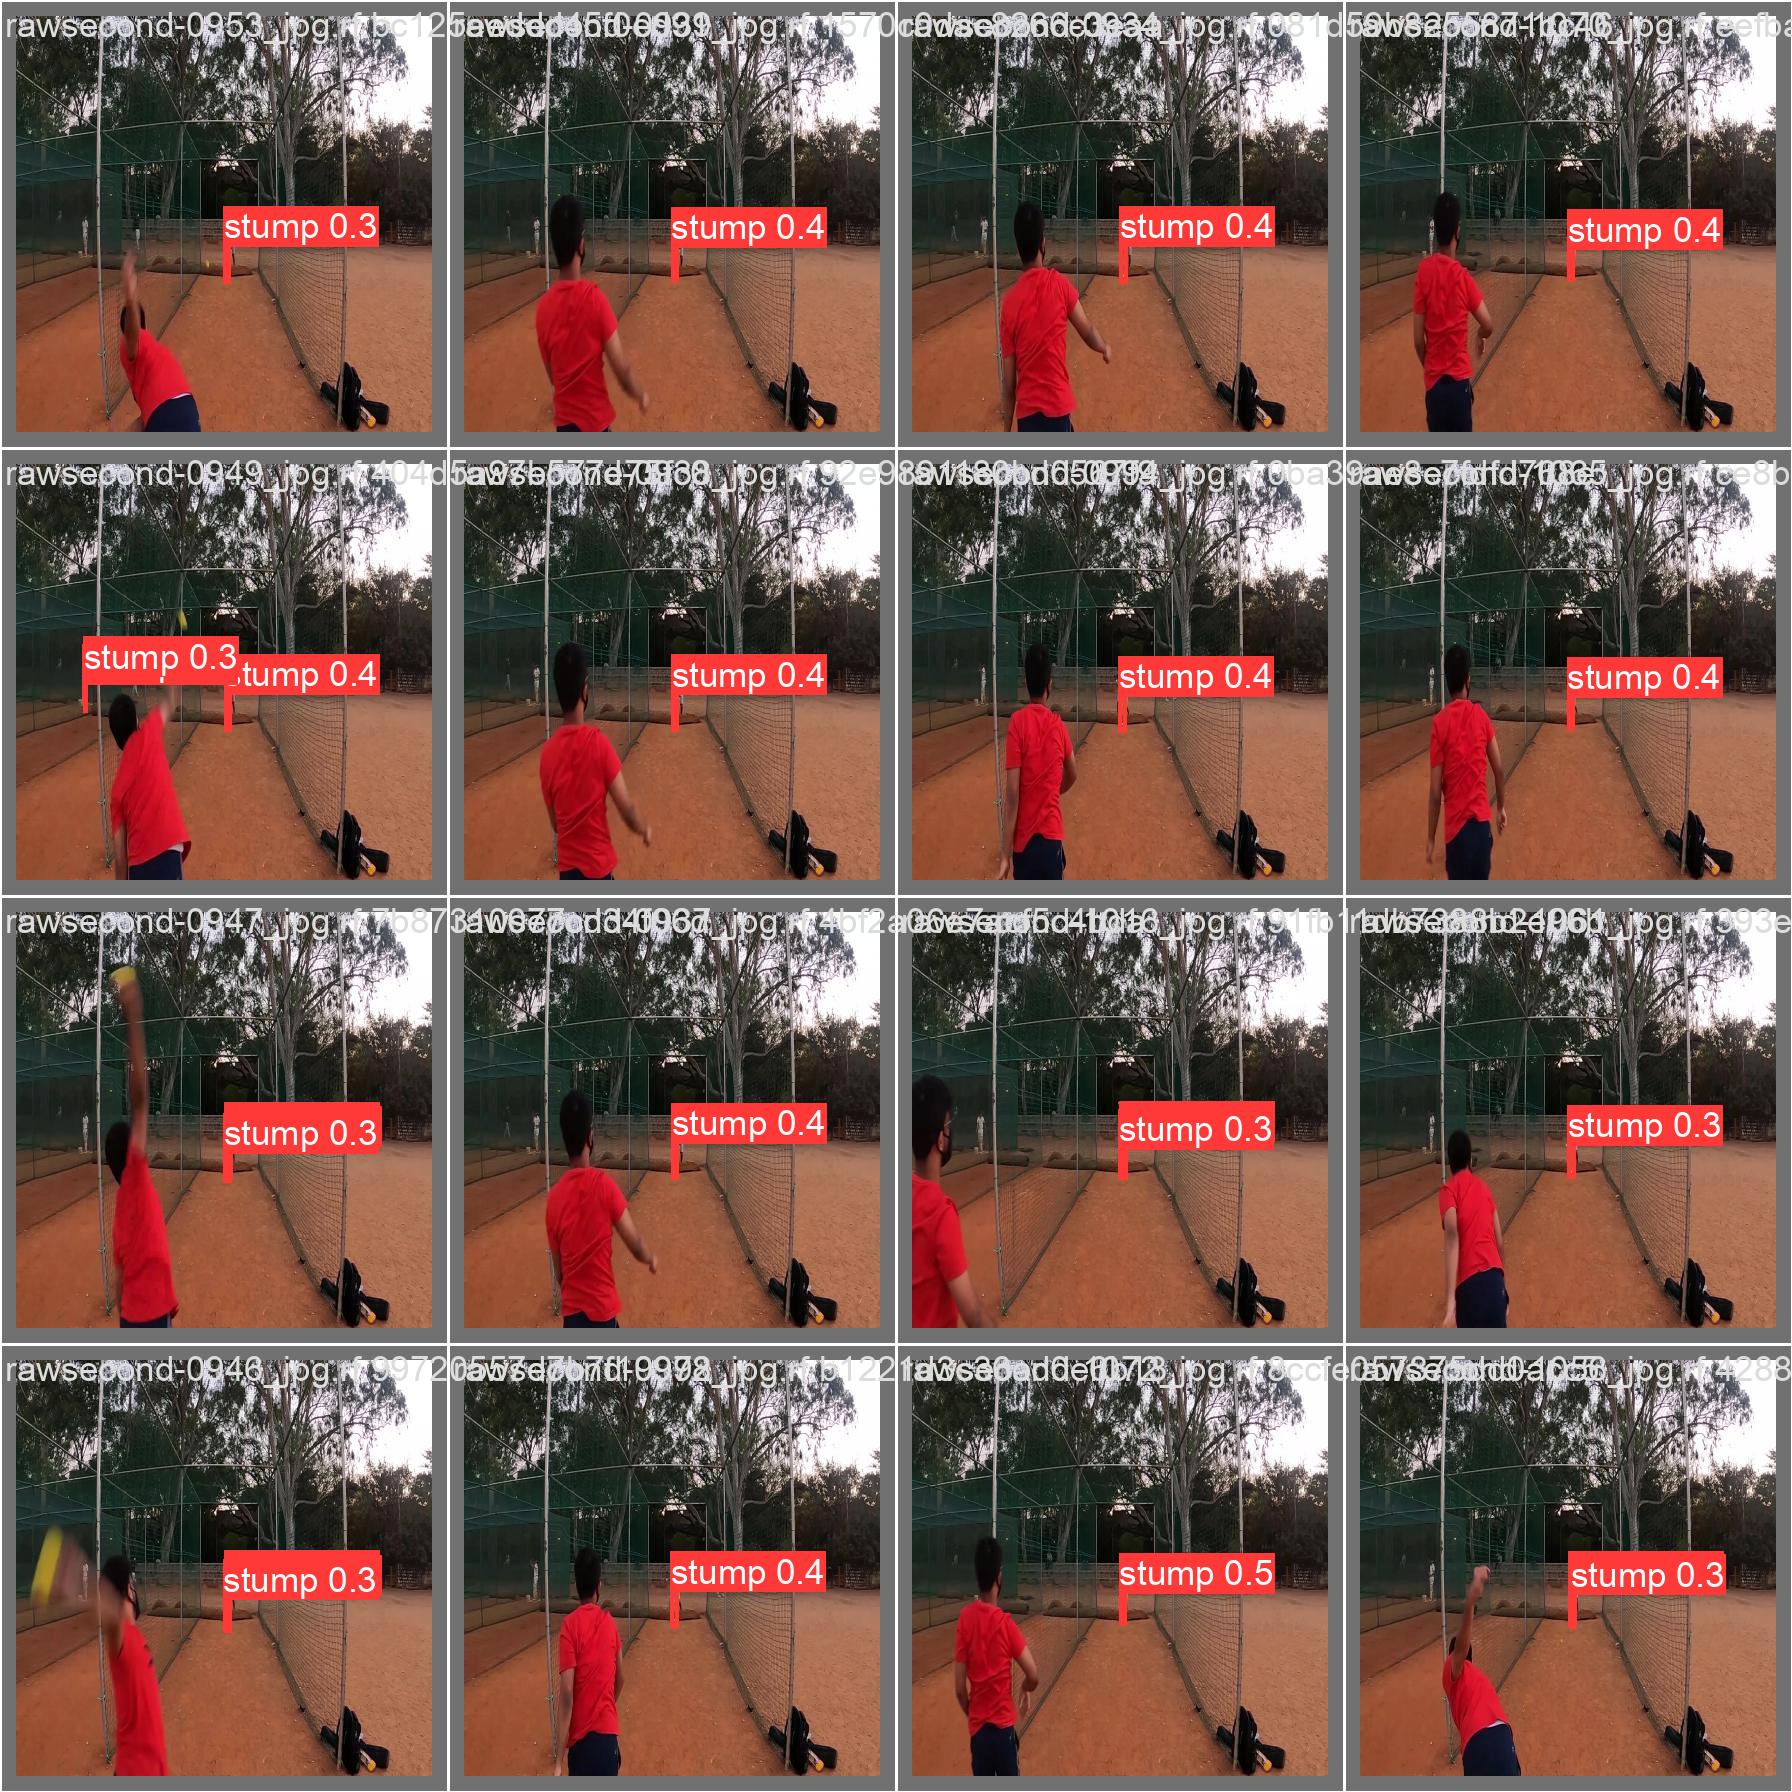

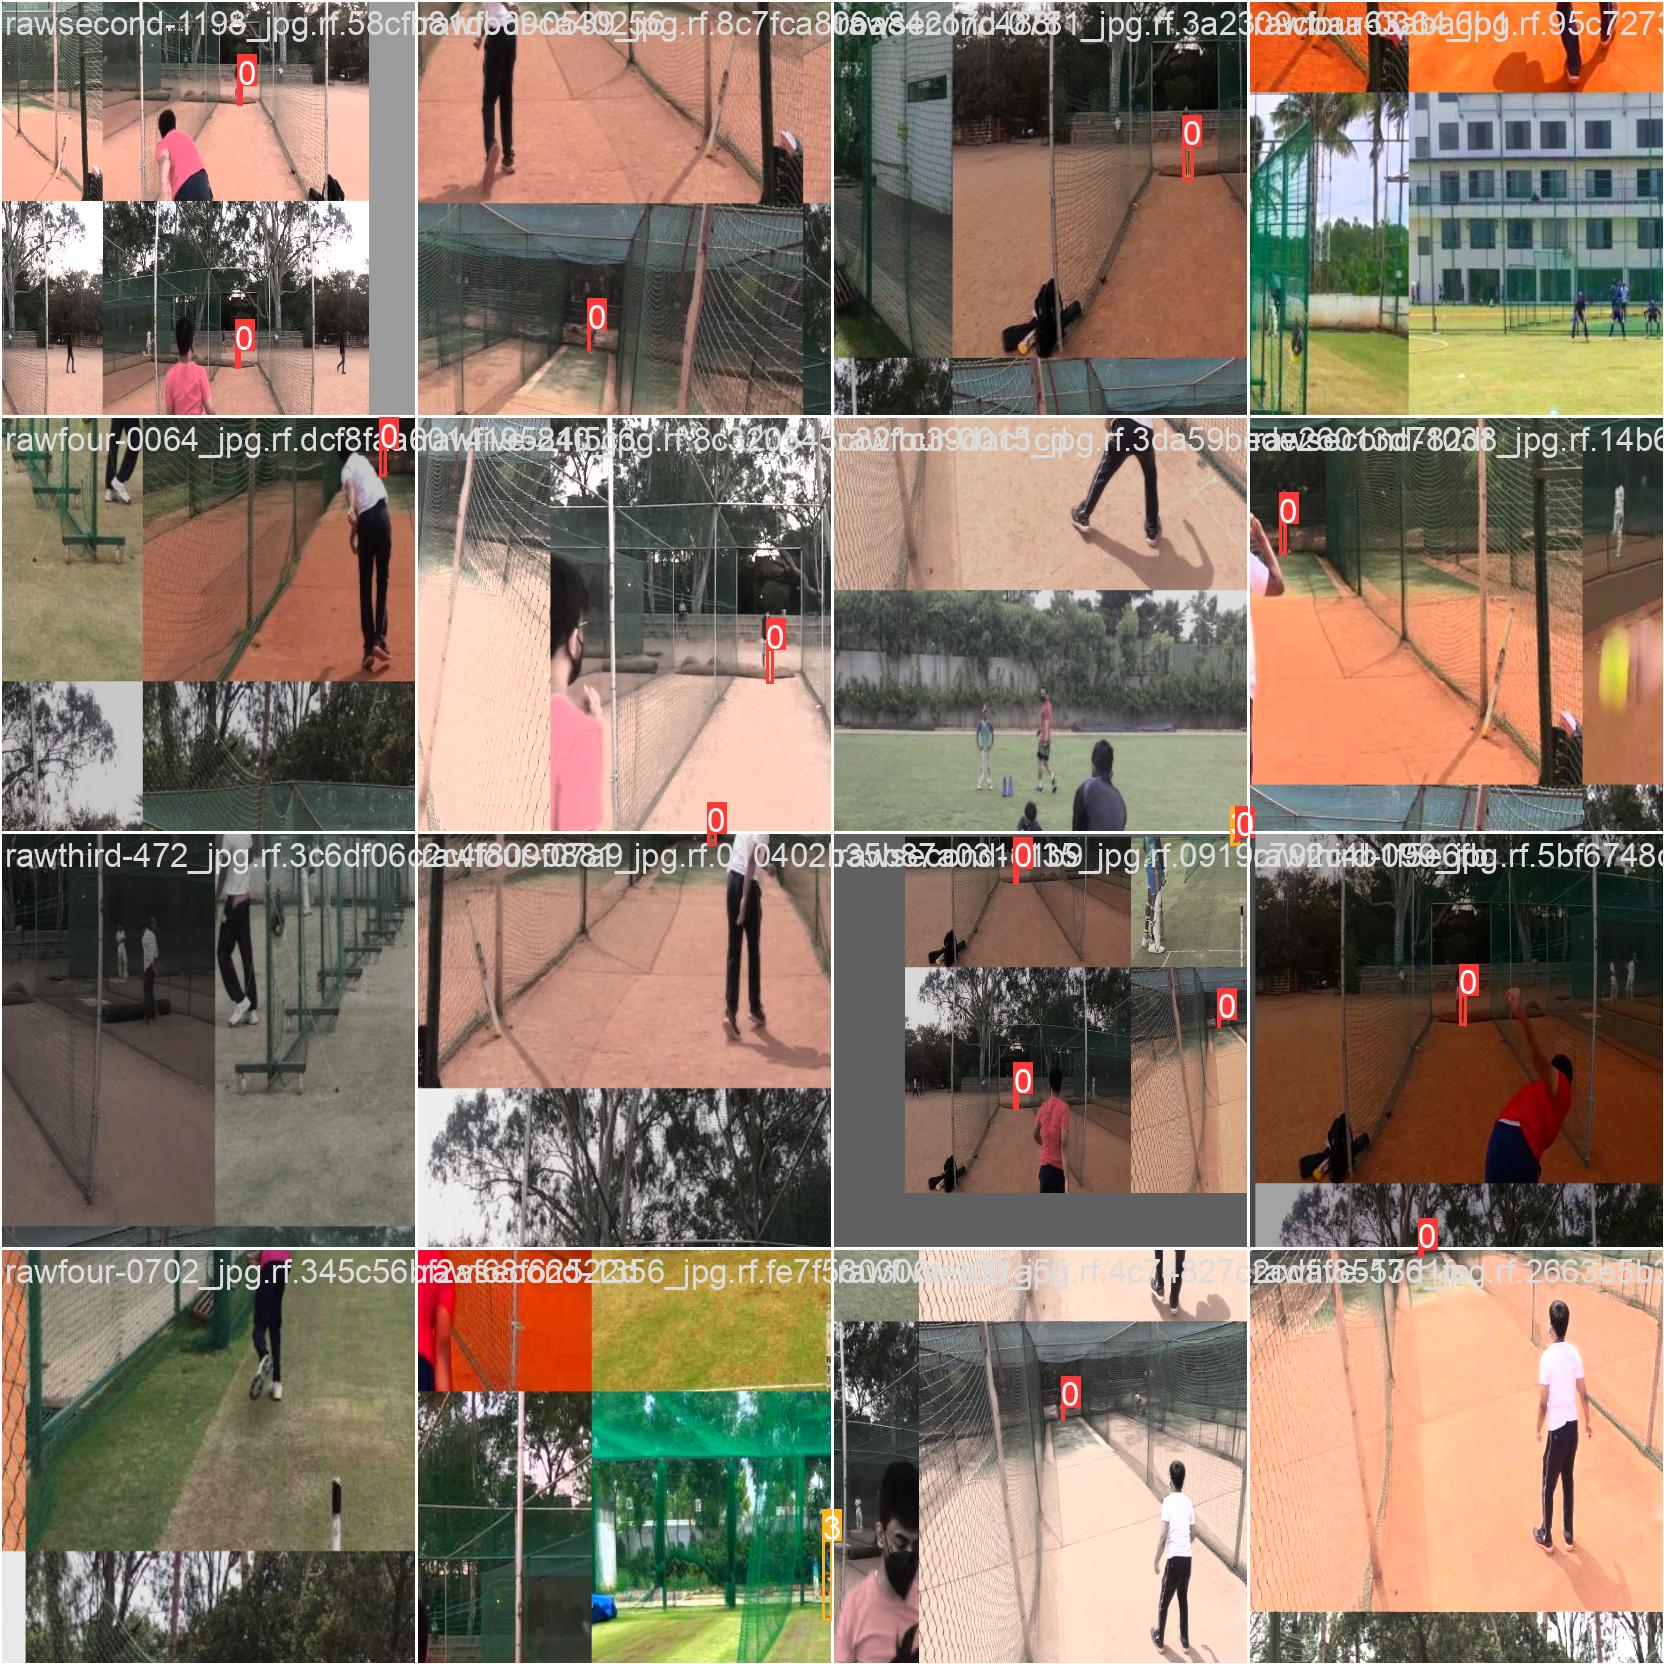

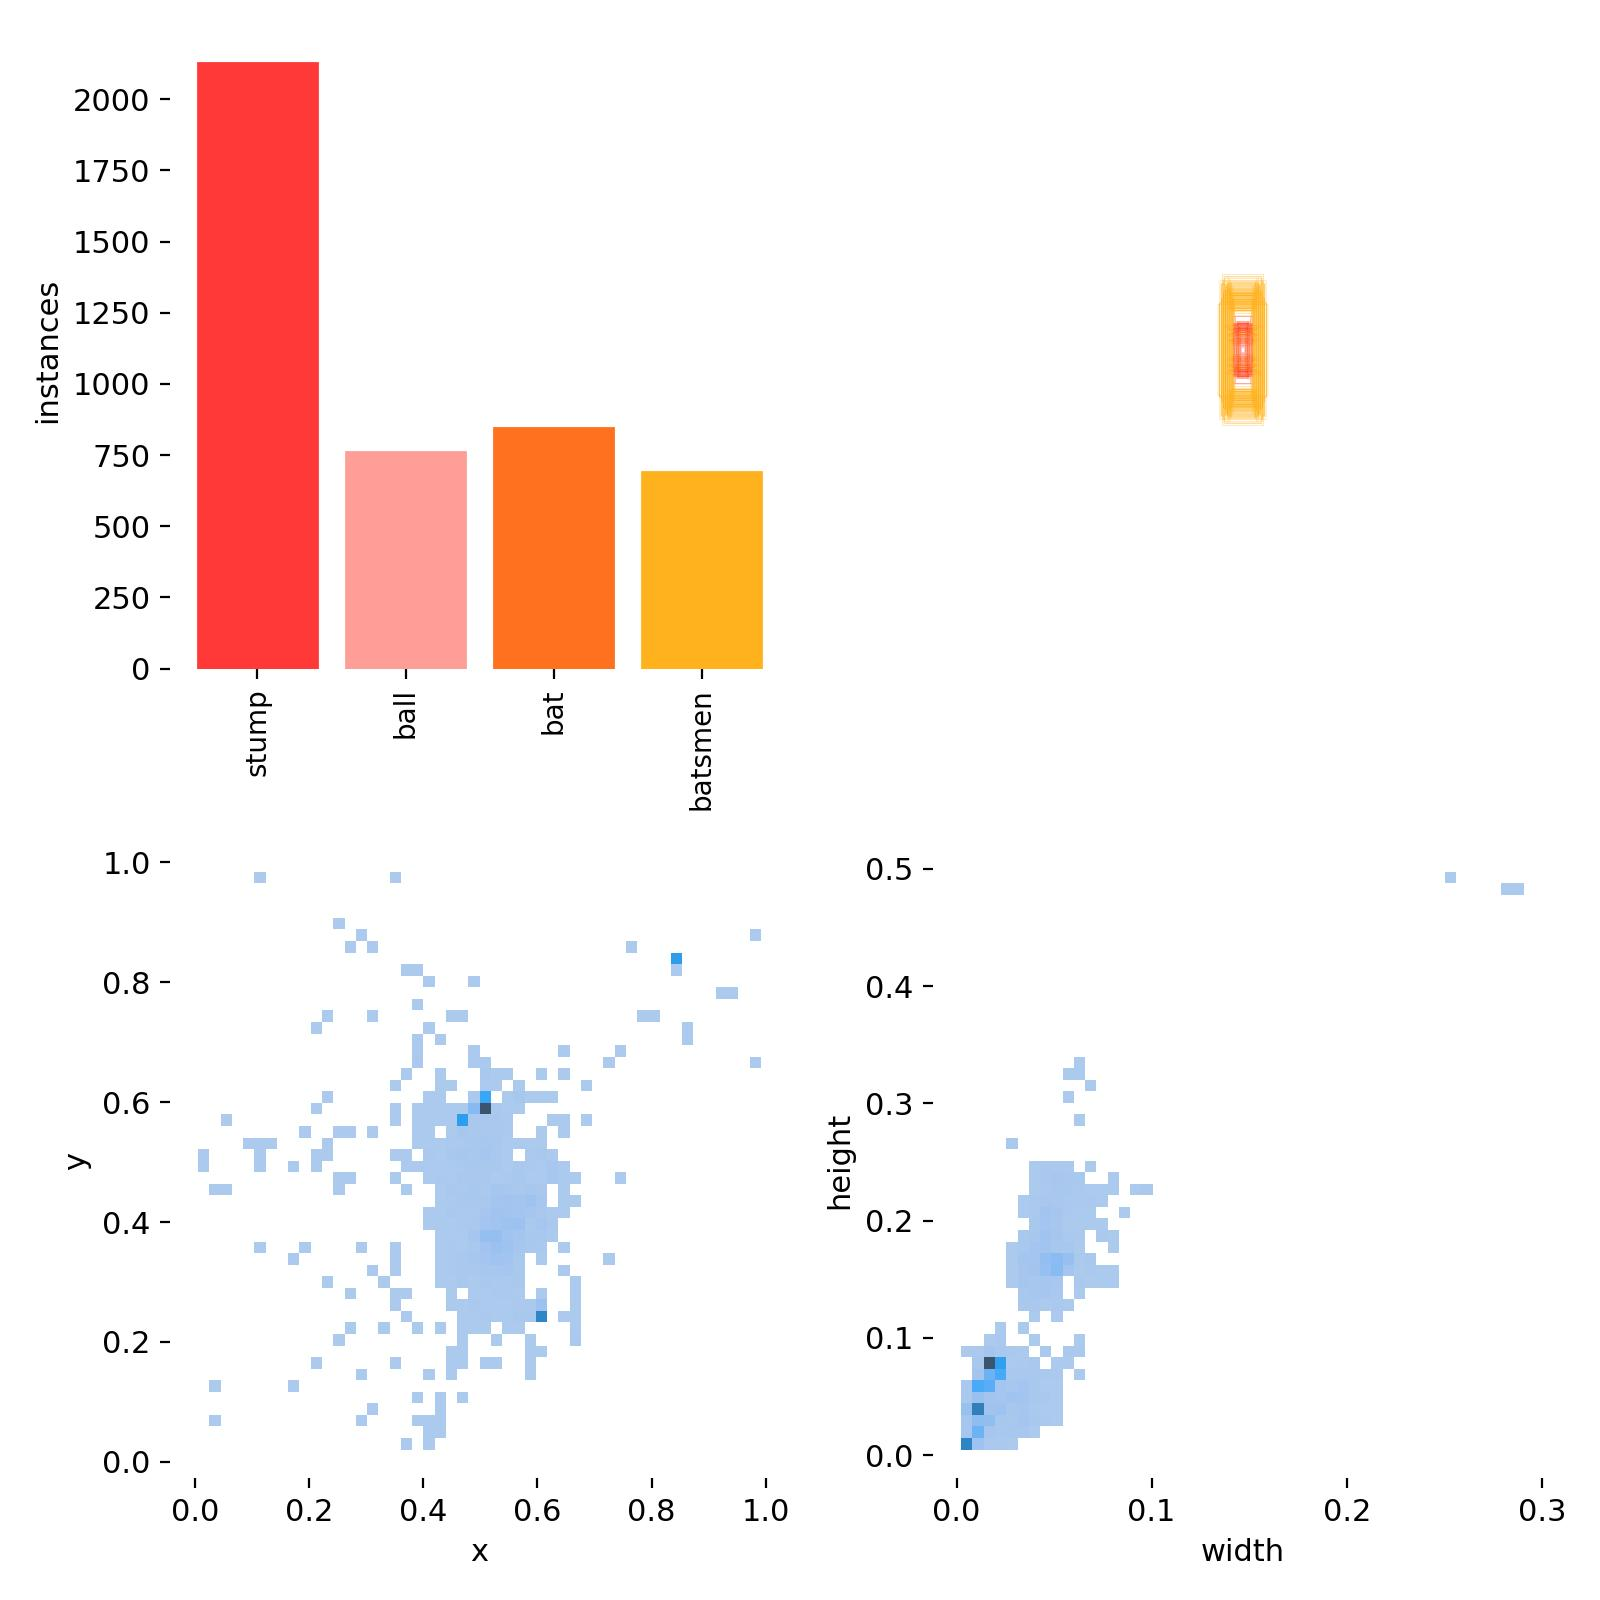

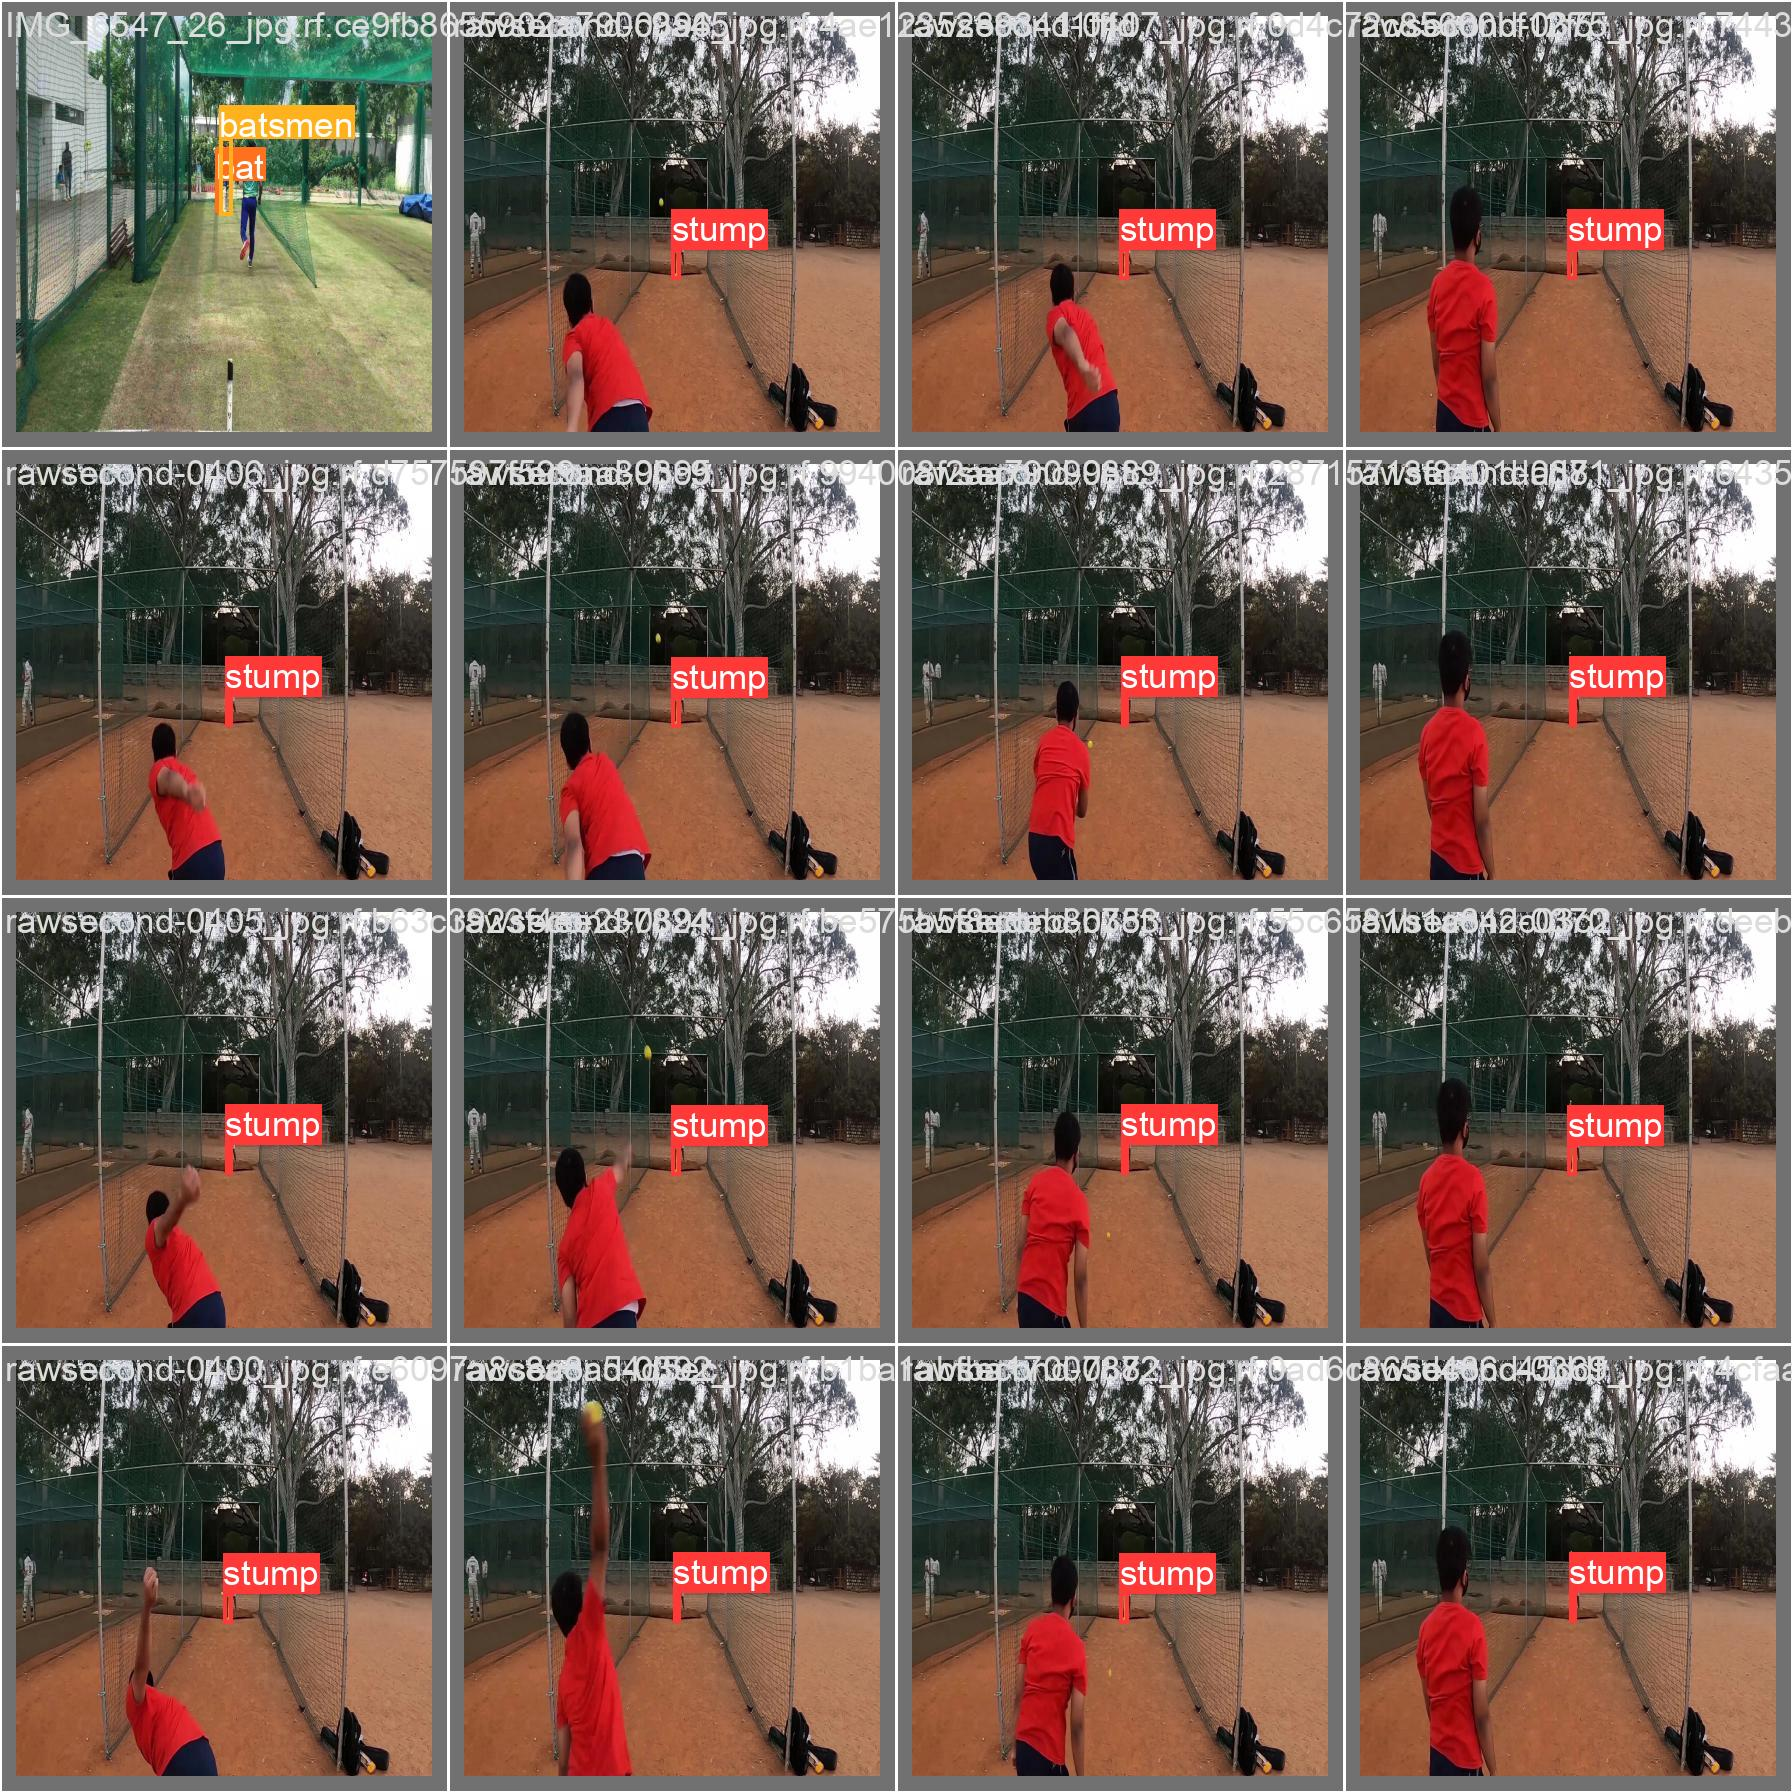

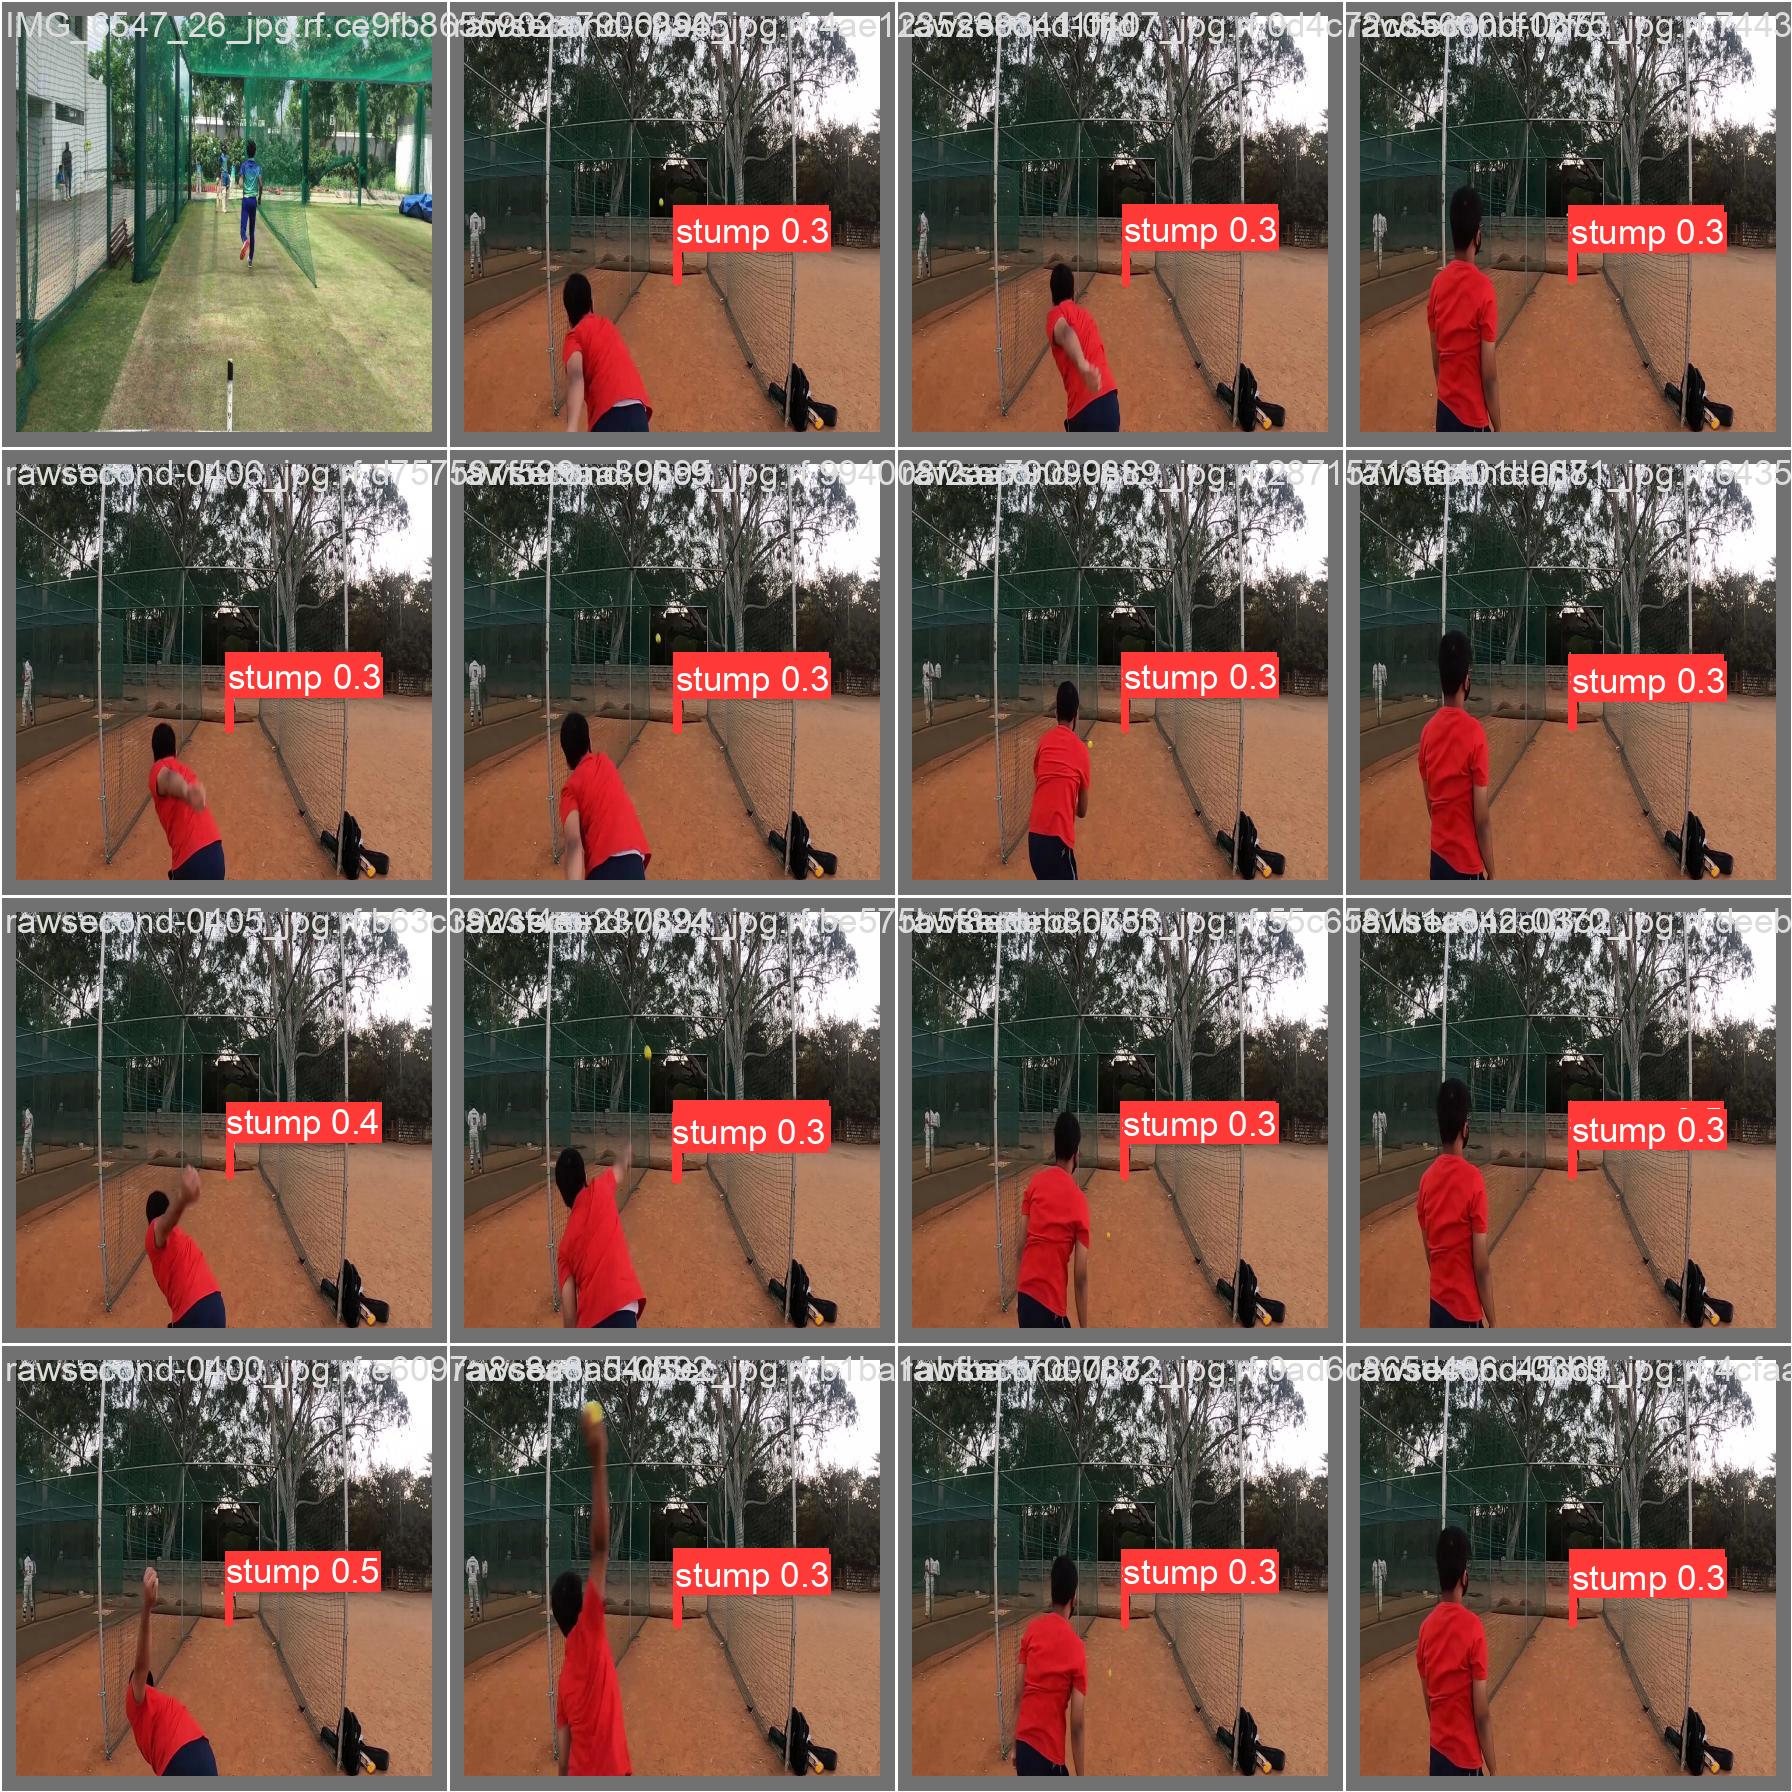

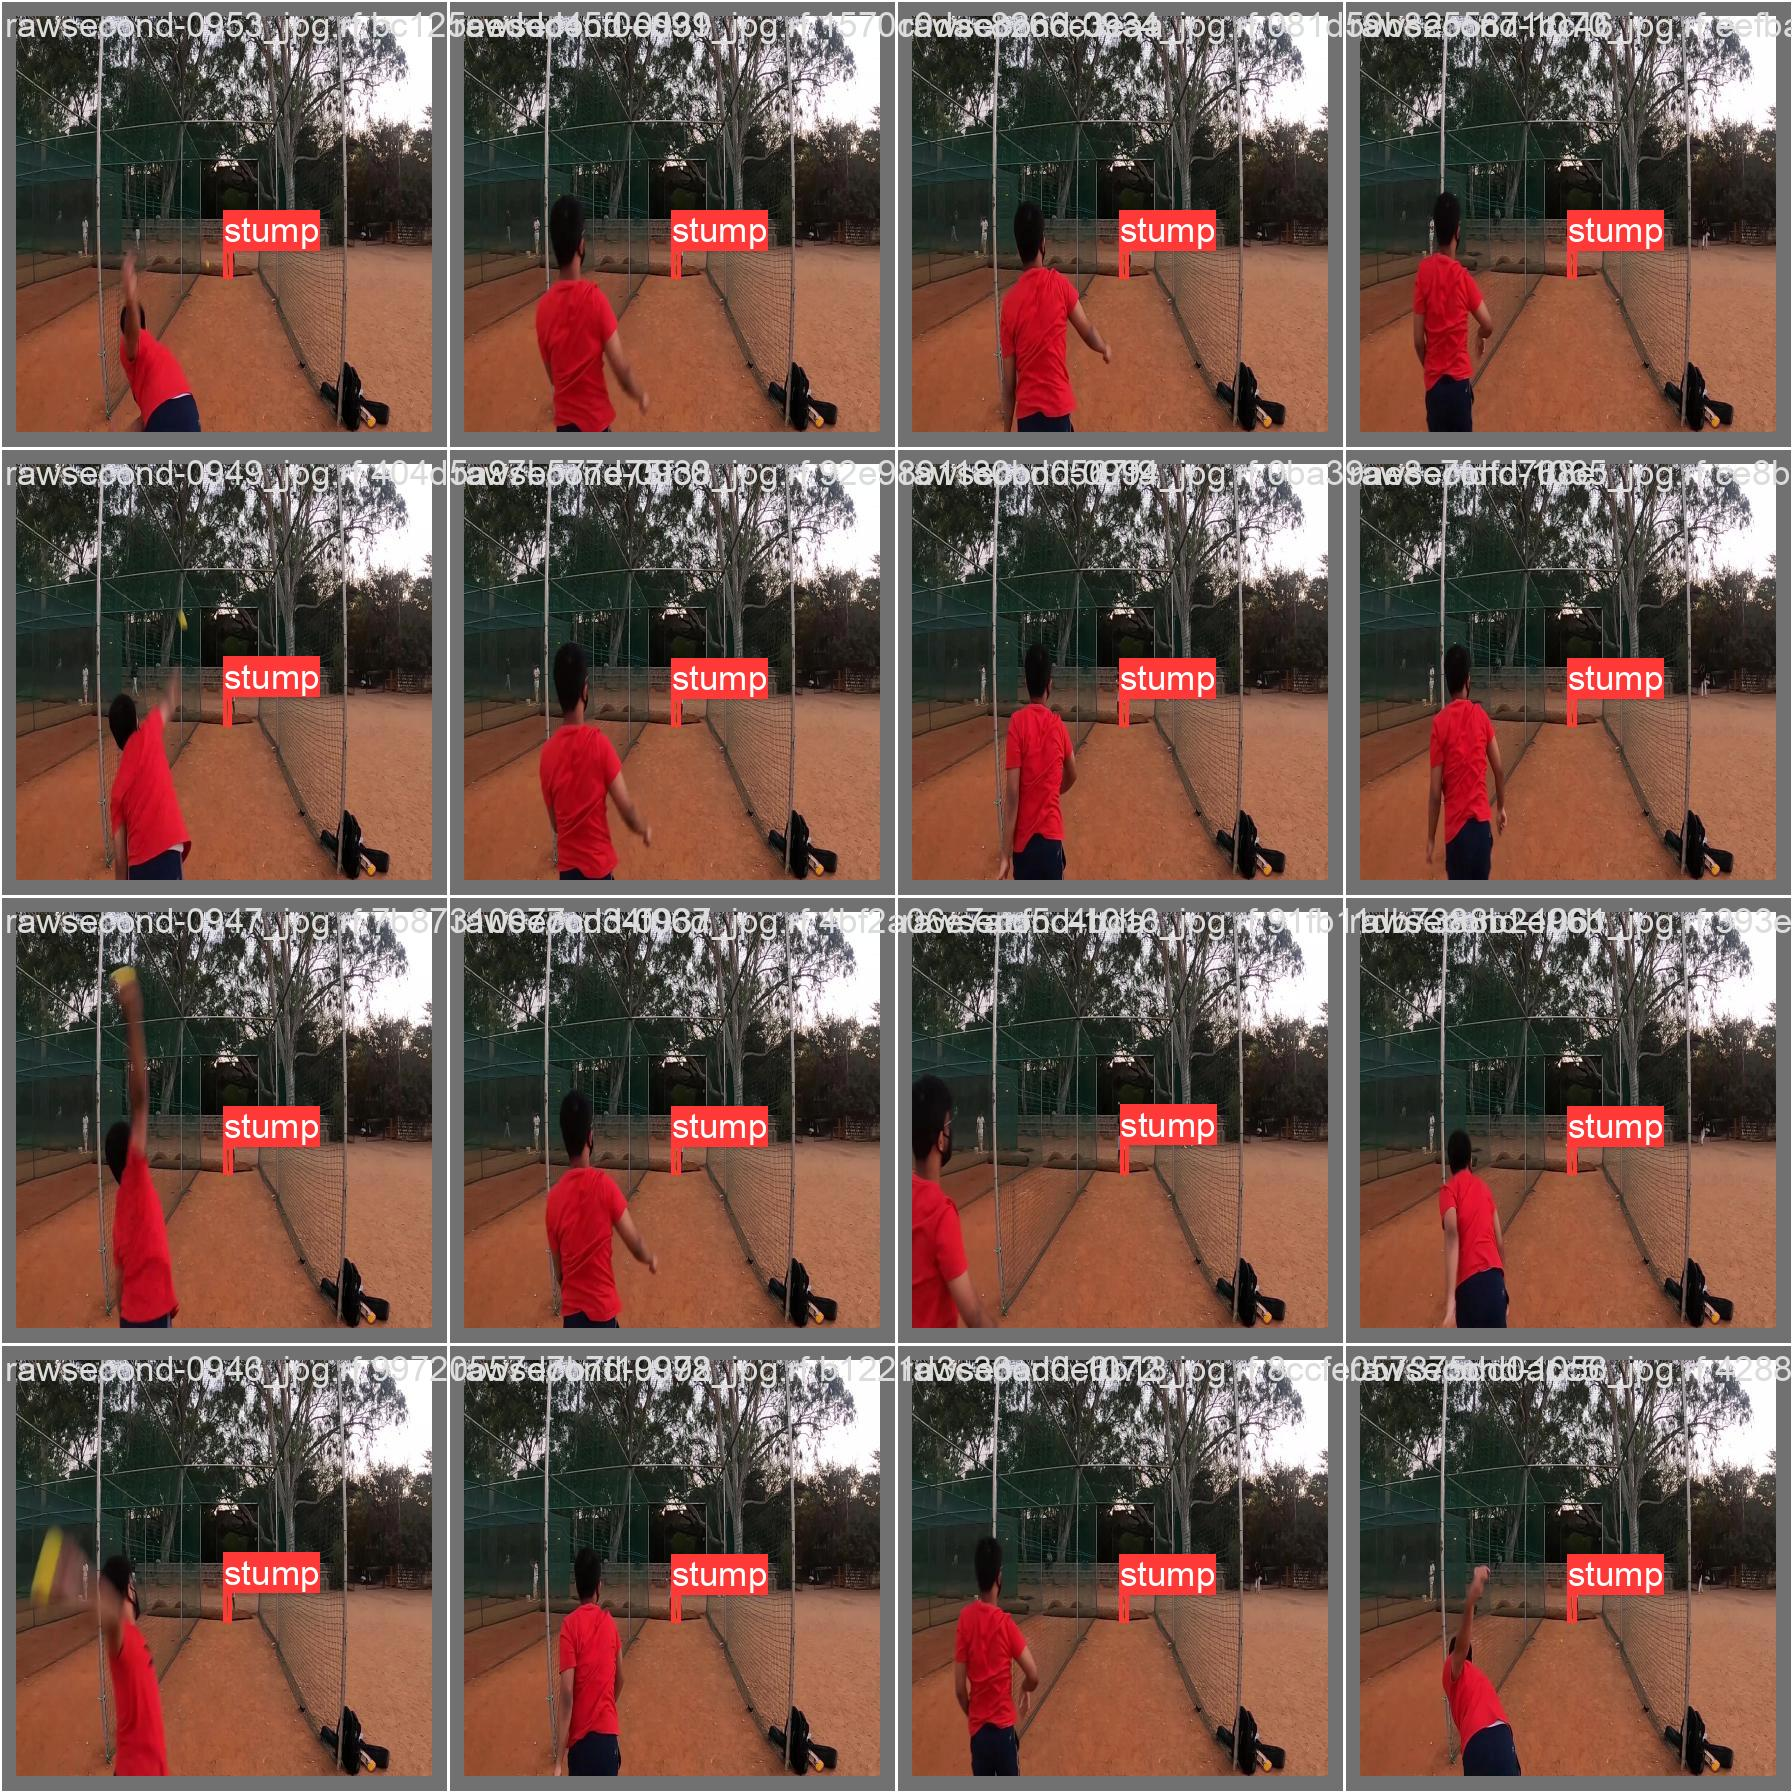

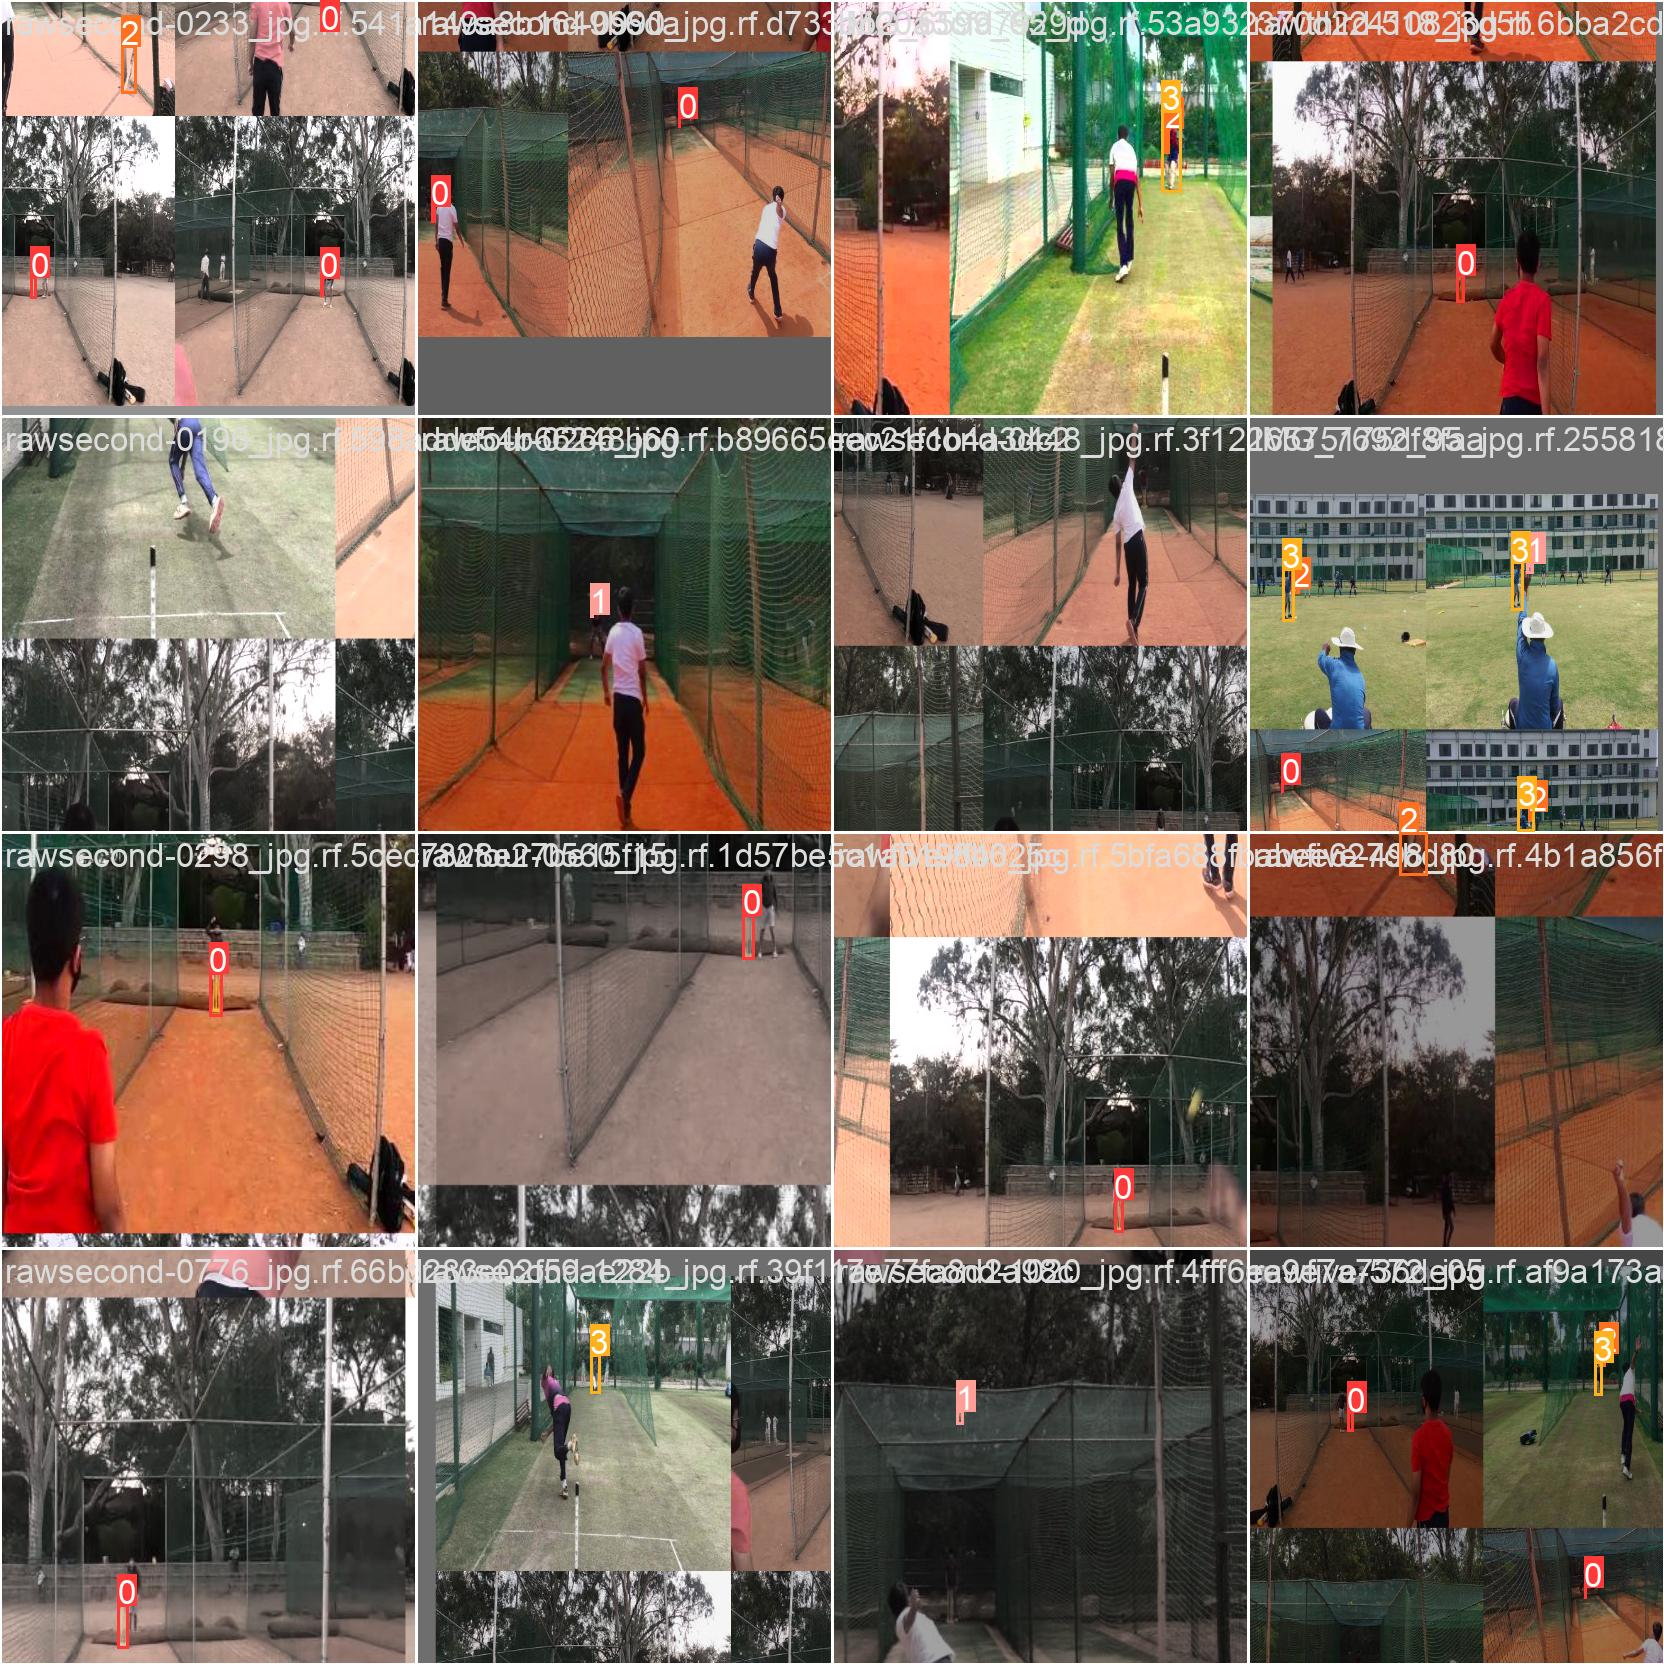

In [80]:
import os
from IPython.display import Image, display

# Iterate over all files in the directory
for filename in os.listdir(results_location):
    if filename.endswith(".jpg" or ".png"):
        # Display the image using IPython.display
        display(Image(filename=os.path.join(results_location, filename)))
